## Contexto

El Sistema Electrico Nacional reúne a distintas empresas que en su conjunto se encargan de la generación, transmisión, distribución y consumo de energía en Chile. Para lograr esto, existen instalaciones que cumplen distintas funciones en el sistema, incluyendo:

* Centrales eléctricas generadoras.
* Líneas de transmisión troncal.
* Líneas de subtransmisión y adicionales.
* Subestaciones eléctricas.
* Barras de consumo.

El Coordinador Eléctrico Nacional es el organismo encargado de coordinar la operación de las instalaciones del Sistema Eléctrico Nacional, con el objetivo de garantizar la operación más económica del sistema, preservar su seguridad y garantizar el acceso abierto a los sistemas de transimisón. Dentro de sus funciones debe programar la generación de electricidad, con el objetivo de minimizar el costo marginal.

In [3]:
import requests


# Fuentes de datos
DEMANDA_REAL_URL = 'https://storage.googleapis.com/sistema_electrico_chile/demanda_real.csv'
COSTO_MARGINAL_REAL_URL = "https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_real.csv"
COSTO_MARGINAL_PROG_URL = "https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_programado.csv"
BASE_PREDICCION_URL = "https://storage.googleapis.com/sistema_electrico_chile/base_para_prediccion.csv"
DATOS_CLIMA_URL = "https://storage.googleapis.com/sistema_electrico_chile/datos_clima.csv"

# Chequeando headers, Aproximadamente 10 MB
response = requests.head(BASE_PREDICCION_URL)
response.headers

{'X-GUploader-UploadID': 'ABg5-Uz9xsiebWoydiu1RpESm4qJGDQQR9ODYcCoa7_yqe4wjgqR2o2vwOhEu_wWv15XJBqy8z3cm3gmwTI9wx6LlXc', 'Expires': 'Wed, 30 Sep 2020 20:54:40 GMT', 'Date': 'Wed, 30 Sep 2020 19:54:40 GMT', 'Cache-Control': 'public, max-age=3600', 'Last-Modified': 'Thu, 24 Sep 2020 22:31:35 GMT', 'ETag': '"1bbd4a620ebd391811672576344db53c"', 'x-goog-generation': '1600986695078077', 'x-goog-metageneration': '1', 'x-goog-stored-content-encoding': 'identity', 'x-goog-stored-content-length': '10782529', 'Content-Type': 'application/octet-stream', 'x-goog-hash': 'crc32c=ci3gcg==, md5=G71KYg69ORgRZyV2NE21PA==', 'x-goog-storage-class': 'STANDARD', 'Accept-Ranges': 'bytes', 'Content-Length': '10782529', 'Server': 'UploadServer', 'Alt-Svc': 'h3-Q050=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-27=":443"; ma=2592000,h3-T051=":443"; ma=2592000,h3-T050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,quic=":443"; ma=2592000; v="46,43"'}

In [4]:
import pandas as pd


# Costo marginal real
costo_marginal_real_df = pd.read_csv(COSTO_MARGINAL_REAL_URL)
costo_marginal_real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309951 entries, 0 to 4309950
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   barra_mnemotecnico             object 
 1   barra_referencia_mnemotecnico  object 
 2   fecha                          object 
 3   hora                           int64  
 4   costo_en_dolares               float64
 5   costo_en_pesos                 float64
 6   nombre                         object 
dtypes: float64(2), int64(1), object(4)
memory usage: 230.2+ MB


In [5]:
costo_marginal_prog_df = pd.read_csv(COSTO_MARGINAL_PROG_URL)
costo_marginal_prog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192124 entries, 0 to 1192123
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   mnemotecnico_barra  1192124 non-null  object 
 1   nombre_barra        1192124 non-null  object 
 2   fecha               1192124 non-null  object 
 3   hora                1192124 non-null  int64  
 4   costo               1192124 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 45.5+ MB


In [6]:
costo_marginal_real_df.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [7]:
costo_marginal_prog_df.head()

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [8]:
costo_marginal_prog_df["mnemotecnico_barra"].value_counts()

-                    180115
BA02T003SE004T003      8690
BA01T002SE036T002      8690
BA83L131SE134L131      7538
BA02T005SE014T005      4345
                      ...  
BA01G119SE001G119      3769
BA01L120SE073L120      3769
BA47L120SE122L120      3769
BA22L120SE114L120      3769
BA01R002SE020R002      3769
Name: mnemotecnico_barra, Length: 239, dtype: int64

In [9]:
# Solo para verificar que estan por barra, fecha y hora
print(f'Cantidad de registros {costo_marginal_prog_df.shape[0]}')
print(f"Cantidad de barras diferentes {len(costo_marginal_prog_df['mnemotecnico_barra'].unique())}")

Cantidad de registros 1192124
Cantidad de barras diferentes 239


In [10]:
costo_marginal = pd.merge(costo_marginal_real_df,
                          costo_marginal_prog_df,
                          how='left',
                          left_on=['barra_mnemotecnico', 'fecha', 'hora'],
                          right_on=['mnemotecnico_barra','fecha', 'hora'])

In [11]:
costo_marginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322410 entries, 0 to 4322409
Data columns (total 10 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   barra_mnemotecnico             object 
 1   barra_referencia_mnemotecnico  object 
 2   fecha                          object 
 3   hora                           int64  
 4   costo_en_dolares               float64
 5   costo_en_pesos                 float64
 6   nombre                         object 
 7   mnemotecnico_barra             object 
 8   nombre_barra                   object 
 9   costo                          float64
dtypes: float64(3), int64(1), object(6)
memory usage: 362.8+ MB


<Figure size 800x800 with 0 Axes>

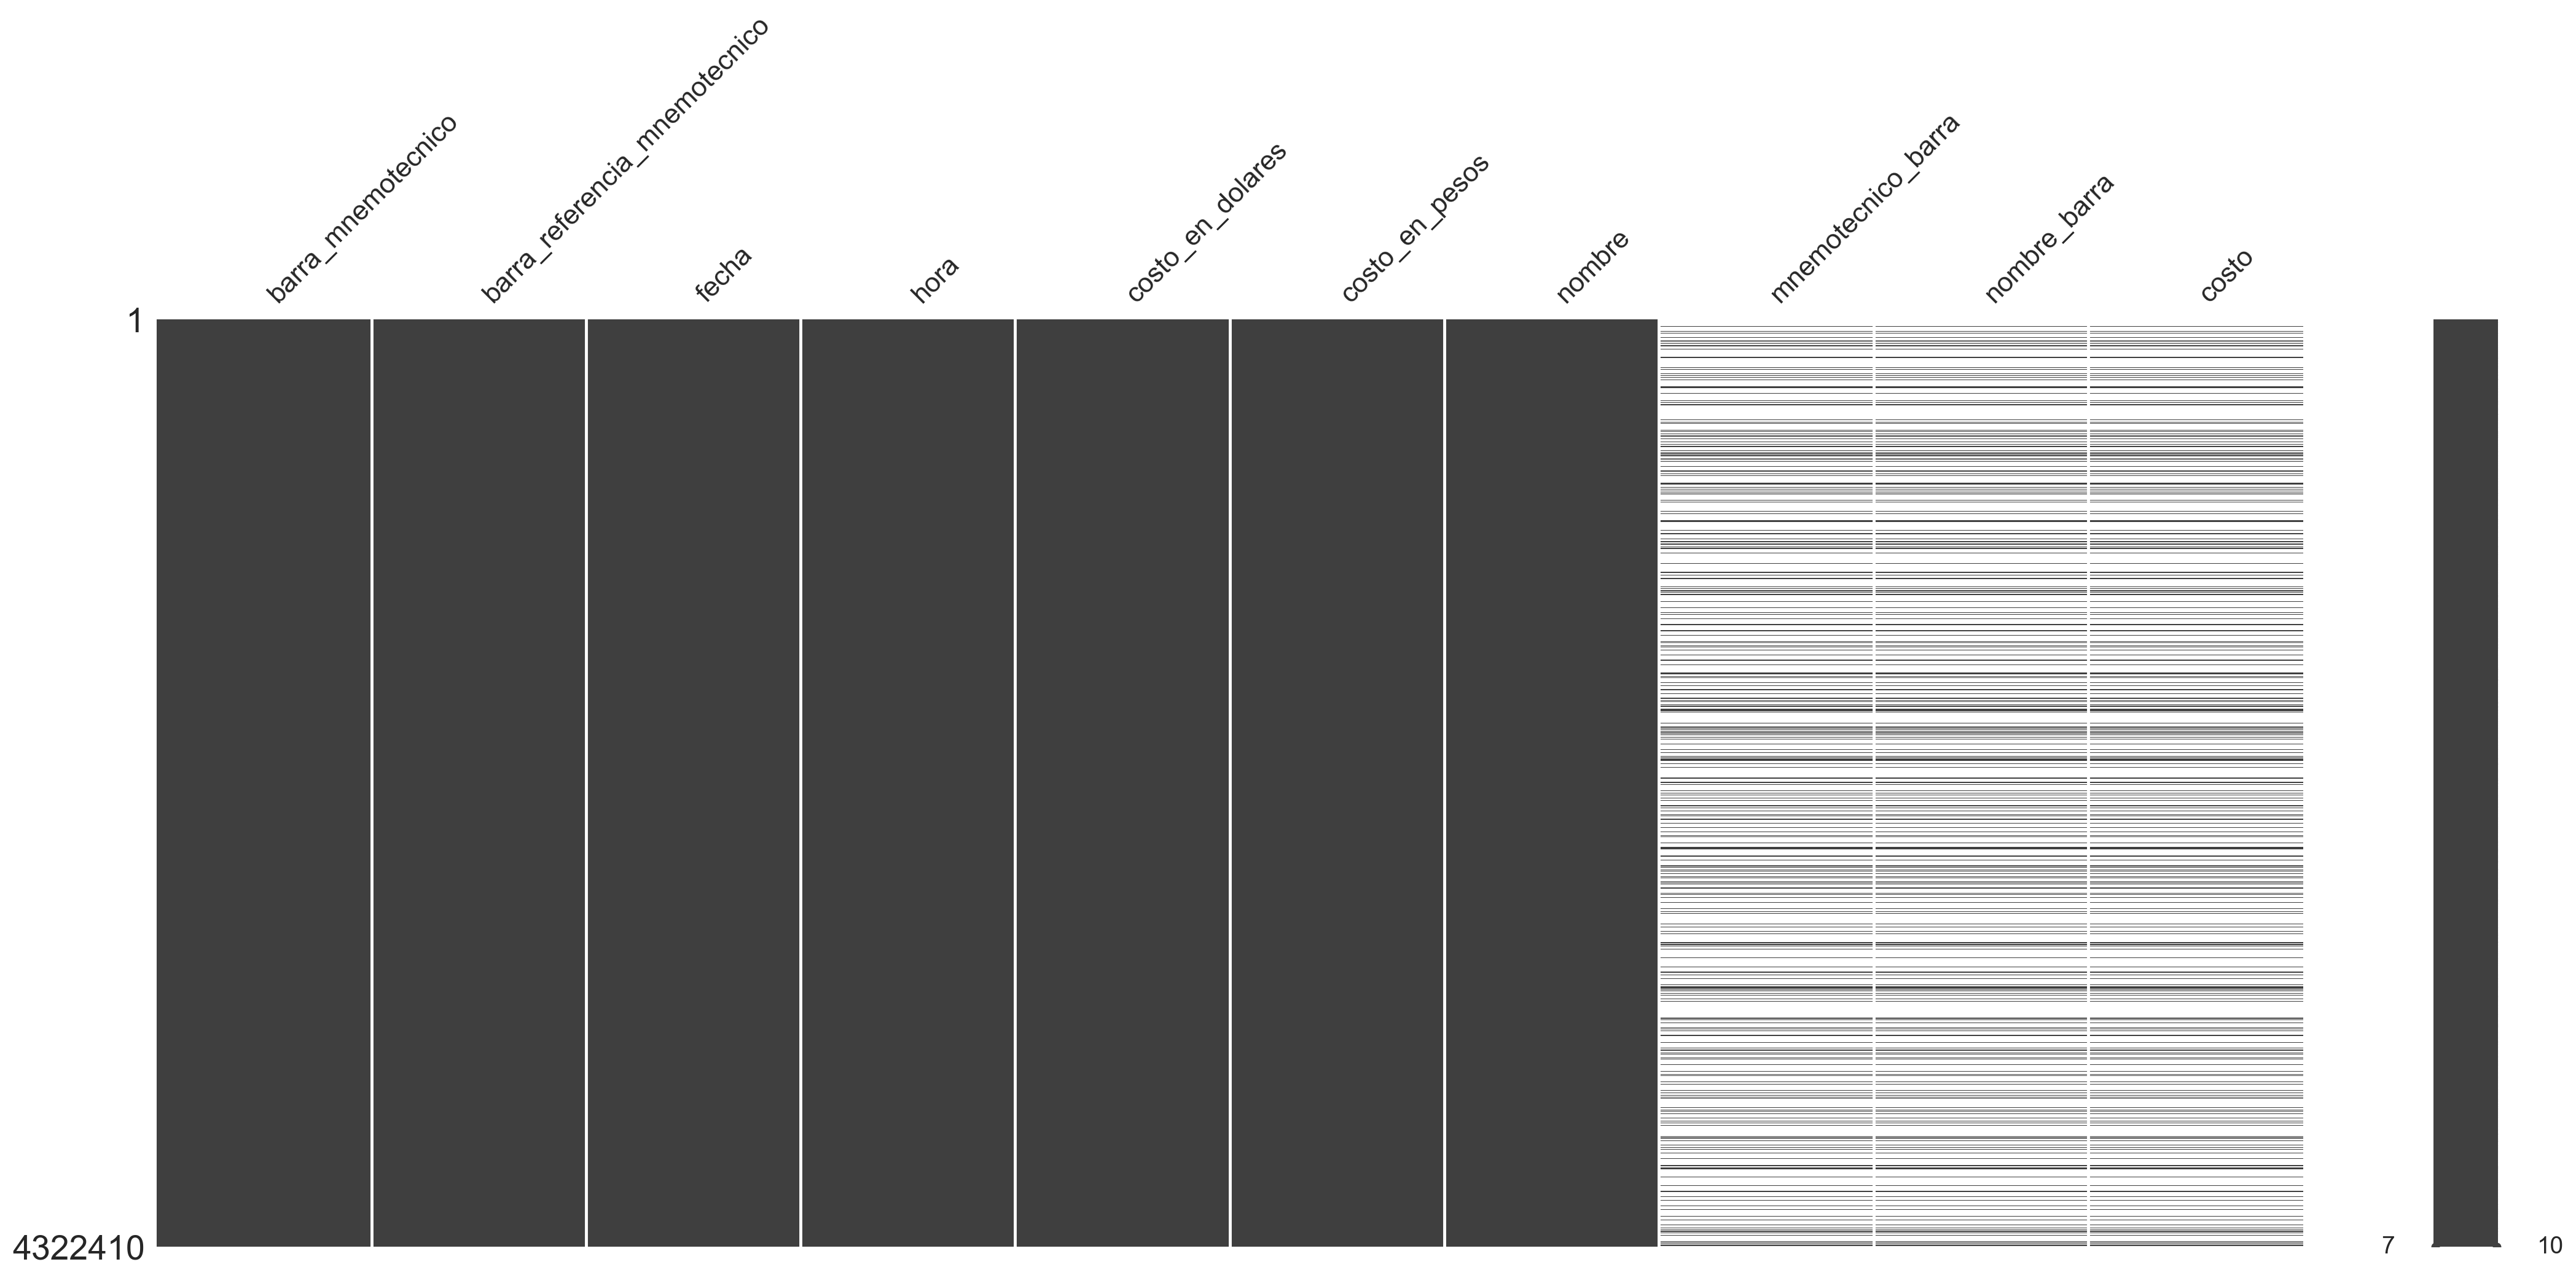

In [13]:
import matplotlib.pyplot as plt
import missingno
import numpy as np

%matplotlib inline

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 200

plt.figure(figsize=(4,4))

missingno.matrix(costo_marginal)

In [18]:
print(f"Cantidad de barras costo programado {len(costo_marginal_prog_df['mnemotecnico_barra'].unique())}")
print(f"Cantidad de barras costo real {len(costo_marginal_real_df['barra_mnemotecnico'].unique())}")

ratio = (len(costo_marginal_prog_df['mnemotecnico_barra'].unique())
         /len(costo_marginal_real_df['barra_mnemotecnico'].unique()))
print(f"Proporcion costo barras programdas: {round(ratio, 2)}")

Cantidad de barras costo programado 239
Cantidad de barras costo real 1020
Proporcion costo barras programdas: 0.23


In [35]:
descriptive_stats = costo_marginal.groupby(['mnemotecnico_barra'], as_index=False).agg(
                      {'costo':['mean','std'], 'costo_en_dolares': ['mean', 'std']})

In [36]:
descriptive_stats

mnemotecnico_barra       costo            costo_en_dolares           
                              mean        std             mean        std
0    BA01G004SE001T011   60.598362  14.178671        64.054147  20.658934
1    BA01G004SE009G004   58.820012  13.893296        61.865586  19.992377
2    BA01G004SE017G004   58.781533  13.859456        61.697823  19.929960
3    BA01G004SE035G004  109.873432  54.564034       108.499454  55.369325
4    BA01G004SE036G004   59.504194  14.145223        62.576062  20.336756
..                 ...         ...        ...              ...        ...
215  BA94G216SE031G216   59.748793  27.729311        51.921540  15.096040
216  BA95L128SE193L128   64.009547  27.152626        52.823253  15.905276
217  BA96L109SE032L109   60.564177  25.372828        50.295190  14.935826
218  BA97G216SE106G216   59.155172  24.244032        50.180051  14.216561
219  BA99L117SE054L117   61.354183  25.238203        52.008180  14.799240

[220 rows x 5 columns]

In [37]:
import numpy as np


descriptive_stats.columns = [
    'barra',
    'costo_prog_mean',
    'costo_prog_std',
    'costo_real_mean',
    'costo_real_std']

descriptive_stats = descriptive_stats.reindex(columns=sorted(descriptive_stats.columns))
descriptive_stats["diff_mean"] = np.abs(
    descriptive_stats["costo_prog_mean"] - descriptive_stats["costo_real_mean"])

In [38]:
descriptive_stats.head()

,barra,costo_prog_mean,costo_prog_std,costo_real_mean,costo_real_std,diff_mean
0,BA01G004SE001T011,60.598362,14.178671,64.054147,20.658934,3.455785
1,BA01G004SE009G004,58.820012,13.893296,61.865586,19.992377,3.045574
2,BA01G004SE017G004,58.781533,13.859456,61.697823,19.929960,2.916289
3,BA01G004SE035G004,109.873432,54.564034,108.499454,55.369325,1.373978
4,BA01G004SE036G004,59.504194,14.145223,62.576062,20.336756,3.071868


In [42]:
descriptive_stats.sort_values(by="diff_mean", ascending=False)

,barra,costo_prog_mean,costo_prog_std,costo_real_mean,costo_real_std,diff_mean
11,BA01G049SE001G049,58.797859,13.346828,0.000000,0.000000,58.797859
81,BA01T005SE284T005,60.753864,28.543366,40.599264,27.540181,20.154600
51,BA01T002SE026T002,64.250663,48.949717,48.309215,14.319631,15.941448
209,BA88T005SE275T005,69.529948,28.818322,54.206421,16.398812,15.323527
196,BA68T005SE277T005,69.078254,28.601541,53.857153,16.302890,15.221101
...,...,...,...,...,...,...
100,BA02T002SE036T002,61.007833,14.686291,61.818764,20.254225,0.810931
112,BA02T005SE190T005,65.438227,19.229341,64.821033,23.507376,0.617193
68,BA01T002SE062T002,55.394156,17.596376,54.803864,19.749697,0.590292
5,BA01G006SE001G104,54.389001,19.169604,53.974002,19.629757,0.414999


In [45]:
costo_marginal_real_df[costo_marginal_real_df["barra_mnemotecnico"] == "BA01G049SE001G049"]

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
114,BA01G049SE001G049,BA02T002SE032T002,2019-04-06,25,0.0,0.0,BA S/E NUEVA VENTANAS JB1
1157,BA01G049SE001G049,BA02T002SE032T002,2019-01-24,1,0.0,0.0,BA S/E NUEVA VENTANAS JB1
2667,BA01G049SE001G049,BA02T002SE032T002,2019-01-25,1,0.0,0.0,BA S/E NUEVA VENTANAS JB1
3837,BA01G049SE001G049,BA02T002SE032T002,2019-01-26,1,0.0,0.0,BA S/E NUEVA VENTANAS JB1
4566,BA01G049SE001G049,BA02T002SE032T002,2019-01-27,1,0.0,0.0,BA S/E NUEVA VENTANAS JB1
...,...,...,...,...,...,...,...
4305669,BA01G049SE001G049,BA02T002SE032T002,2019-01-19,24,0.0,0.0,BA S/E NUEVA VENTANAS JB1
4306667,BA01G049SE001G049,BA02T002SE032T002,2019-01-20,24,0.0,0.0,BA S/E NUEVA VENTANAS JB1
4307110,BA01G049SE001G049,BA02T002SE032T002,2019-01-21,24,0.0,0.0,BA S/E NUEVA VENTANAS JB1
4308135,BA01G049SE001G049,BA02T002SE032T002,2019-01-22,24,0.0,0.0,BA S/E NUEVA VENTANAS JB1


In [47]:
print(f"Promedio de Diferencia absoluta de medias: {descriptive_stats['diff_mean'].mean()}")
print(f"Desviación estándar de Diferencia absoluta de medias: {descriptive_stats['diff_mean'].std()}")

Promedio de Diferencia absoluta de medias: 6.850227740424266
Desviación estándar de Diferencia absoluta de medias: 5.224567995131731


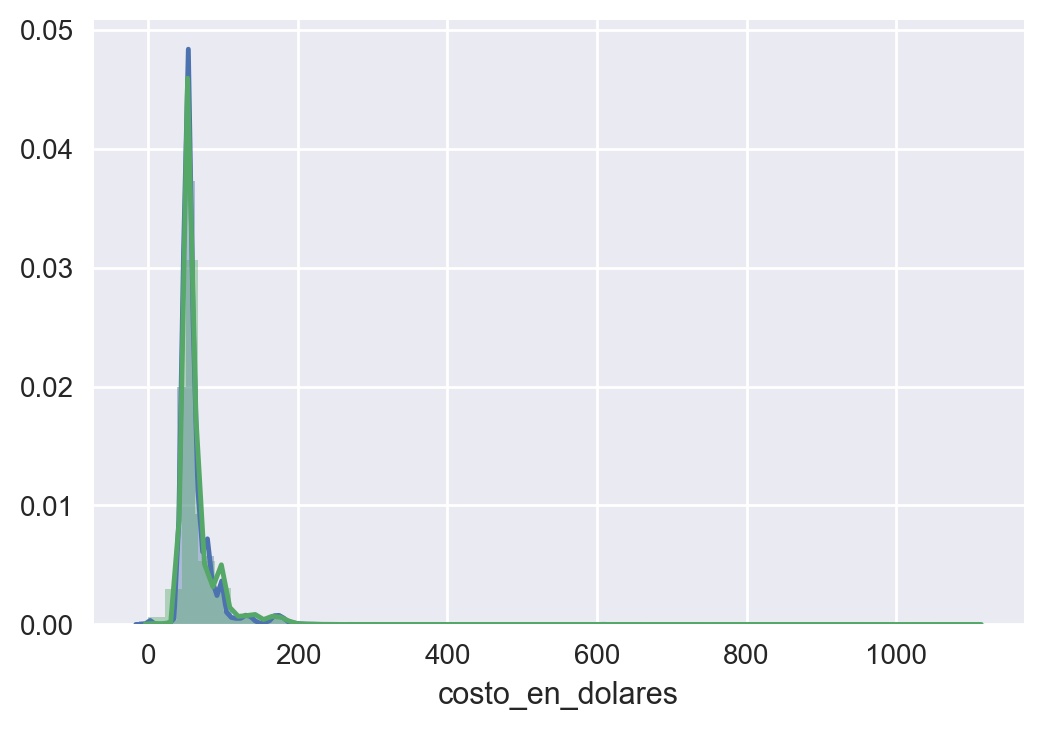

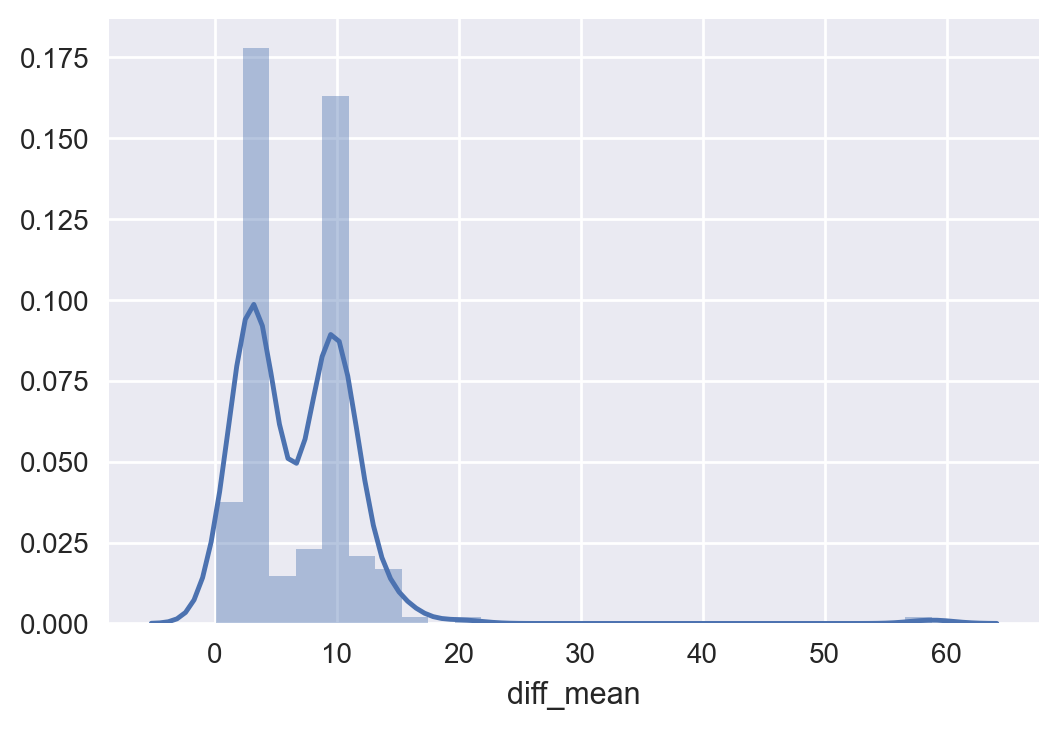

In [50]:
import seaborn as sns


plt.figure()
sns.distplot(costo_marginal["costo"])
sns.distplot(costo_marginal["costo_en_dolares"])

plt.figure()
sns.distplot(descriptive_stats["diff_mean"])

### Comentarios

Es de esperar que exista una gran cantidad de datos "perdidos", ya que el costo marginal programado no existe para todas las barras para todas las fechas, esto se confirma viendo el tamaño de las muestras del costo real marginal y el costo real programado (asumiendo que son los datos existentes). En particular, se programan costos de aproximadamente un 23%  de las barras.

Por otro lado, me llama la atención que la barra `BA01G049SE001G049` haya tenido un costo real de 0 USD/MWH, puede ser un error en los datos, o puede ser que no operó en las fechas en las que se estimó que operaría.

La diferencia absoluta entre el costo programado y el real es aproximadamente de 7 USD/MWh con una desviacion estandar de 5. Por lo que se observa, la distribucion de diferencias es bimodal, centrada alrededor del 4 y del 10. Esto indica, que en general el costo programado se aleja del costo real y puede ser un problema.

In [96]:
import datetime
from typing import List


costo_marginal_prog_df["fecha"] = pd.to_datetime(costo_marginal_prog_df["fecha"])
costo_marginal_real_df["fecha"] = pd.to_datetime(costo_marginal_real_df["fecha"])


def get_date_mask(df: pd.DataFrame, start_date: datetime.datetime,
                  end_date: datetime.datetime) -> List[bool]:
    """Genera mascara para escoger rango de fechas.

    :param df: Dataframe a filtrar
    :type df: pd.DataFrame
    :param start_date: Fecha inicial
    :type start_date: datetime.datetime
    :param end_date: Fecha final
    :type end_date: datetime.datetime
    :raises RuntimeError: Error si df no tiene fecha
    :return: Mascara con indices de filas extraidas.
    :rtype: List[bool]
    """

    if "fecha" not in df.columns:
        raise RuntimeError("El dataframe debe tener la columna fecha!")

    return ((df['fecha'] >= start_date) & (df['fecha'] <= end_date))



def time_plot_costo_barra(codigo_barra: str,
                          fecha_inicial: datetime.datetime,
                          fecha_final: datetime.datetime) -> None:
    """Genera grafico de serie de tiempo de costo para barra.

    :param codigo_barra: Nombre de barra a analizar.
    :type codigo_barra: str
    :param fecha_inicial: Fecha inicial
    :type fecha_inicial: datetime.datetime
    :param fecha_final: Fecha final.
    :type fecha_final: datetime.datetime
    """
    cmg_prog = costo_marginal_prog_df[costo_marginal_prog_df["mnemotecnico_barra"] == codigo_barra]
    cmg_real = costo_marginal_real_df[costo_marginal_real_df["barra_mnemotecnico"] == codigo_barra]
    mask_prog = get_date_mask(costo_marginal_prog_df, fecha_inicial, fecha_final)
    mask_real = get_date_mask(costo_marginal_real_df, fecha_inicial, fecha_final)
    
    cmg_prog = cmg_prog.loc[mask_prog].sort_values(by="fecha")
    cmg_real = cmg_real.loc[mask_real].sort_values(by="fecha")
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(cmg_prog["fecha"], cmg_prog["costo"])
    plt.plot(cmg_real["fecha"], cmg_real["costo_en_dolares"])
    plt.xlabel("fecha")
    plt.ylabel("costo marginal")
    plt.title(f"Barra {codigo_barra}")
    plt.legend(("cmg_prog", "cmg_real"))
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45)

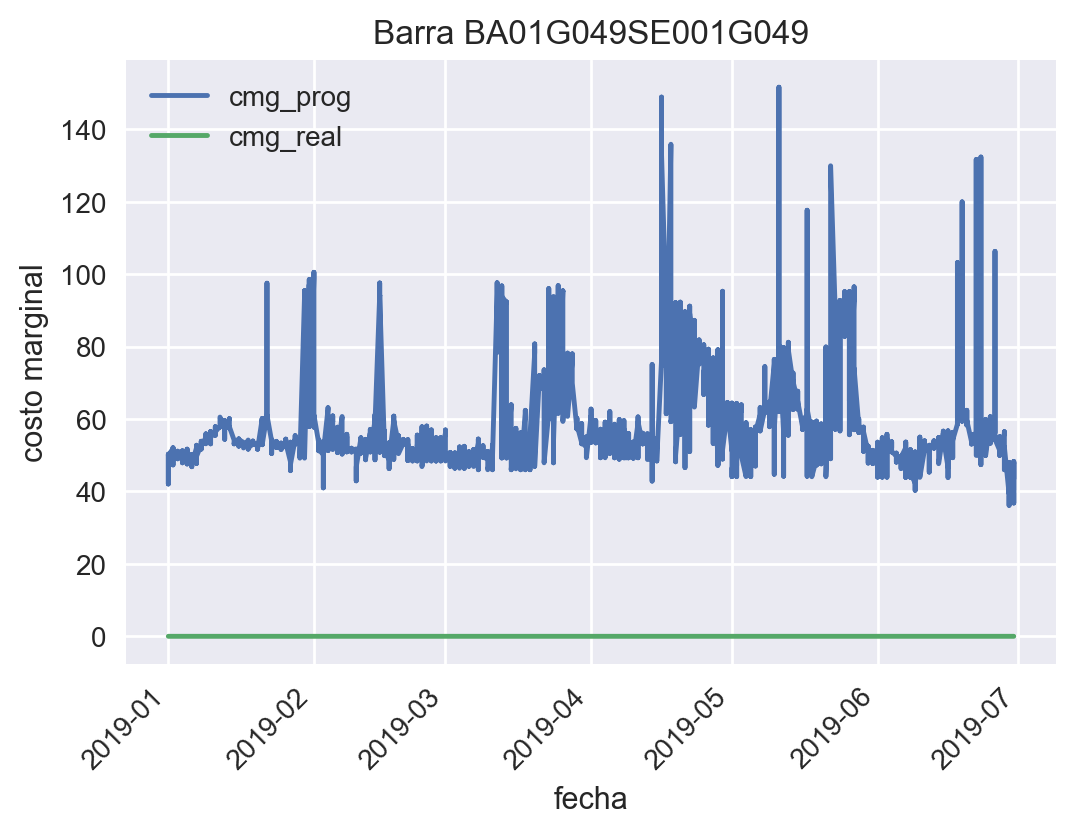

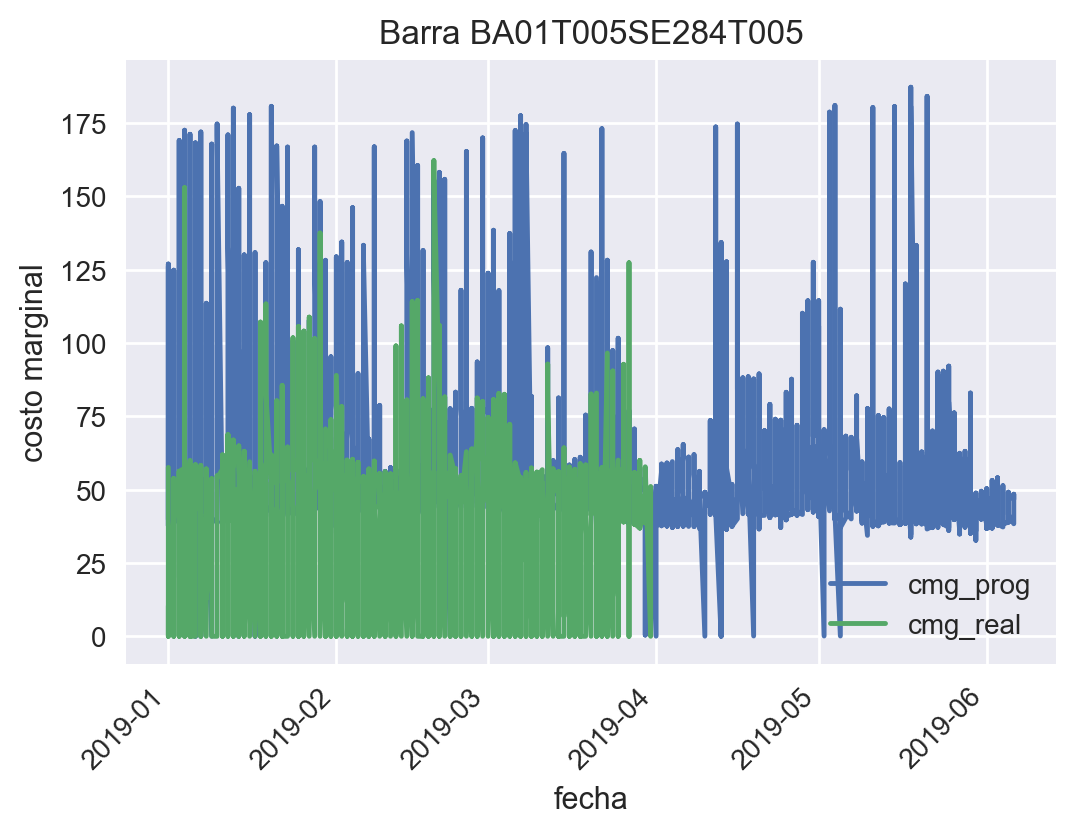

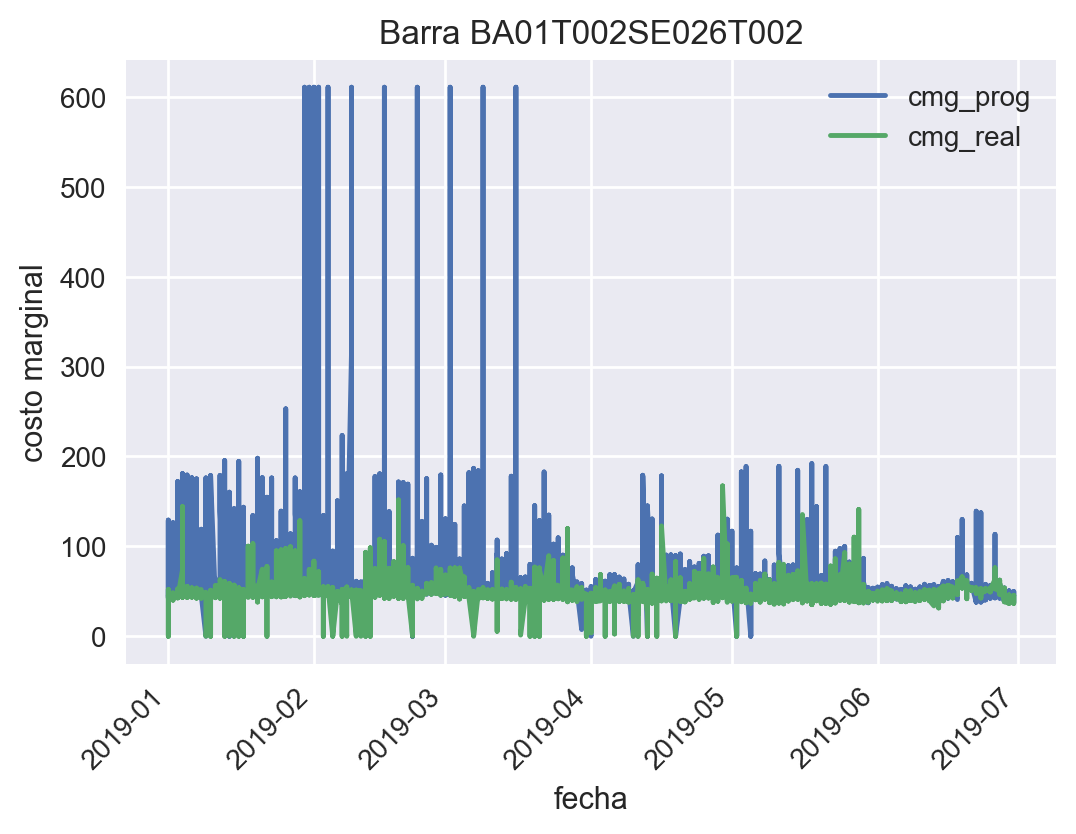

In [100]:
fecha_inicial = datetime.datetime(2019, 1, 1)
fecha_final = datetime.datetime(2019, 7, 1)

time_plot_costo_barra("BA01G049SE001G049", fecha_inicial, fecha_final)
time_plot_costo_barra("BA01T005SE284T005", fecha_inicial, fecha_final)
time_plot_costo_barra("BA01T002SE026T002", fecha_inicial, fecha_final)

In [103]:
# Eliminar barra con 0 costo
descriptive_stats = descriptive_stats[descriptive_stats["barra"] != "BA01G049SE001G049"]

### Visualización de Datos

Se observan varios puntos relevantes, el primero, es que pareciera ser que para las barras con mayor diferencia absoluta entre medias, el costo programado es mucho mayor que el costo real, esto es un problema, ya que es un indicio de que se están utilizando ineficientemente los recursos. También se observa que para algunas barras, no hay un costo real para todas las fechas (ej. `BA01T005SE284T005`). Y la barra con 0 costo real, fue identificada en un paso anterior `BA01G049SE001G049` que probablemente es un outlier para efectos de este análisis, sin embargo, en efectos del proceso, sería interesante preguntar qué ocurrió aquí.

## Base para modelos

In [101]:
base_prediccion = pd.read_csv(BASE_PREDICCION_URL)
base_prediccion.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [102]:
base_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nemotecnico_se            112779 non-null  object 
 1   fecha                     112779 non-null  object 
 2   hora                      112779 non-null  int64  
 3   gen_eolica_total_mwh      0 non-null       float64
 4   gen_geotermica_total_mwh  0 non-null       float64
 5   gen_hidraulica_total_mwh  34184 non-null   float64
 6   gen_solar_total_mwh       41818 non-null   float64
 7   gen_termica_total_mwh     61863 non-null   float64
 8   cmg_real                  112779 non-null  float64
 9   cmg_prog                  112779 non-null  float64
 10  cmg_desv                  112779 non-null  float64
 11  cmg_desv_pct              112779 non-null  float64
 12  n_barras                  112779 non-null  int64  
 13  demanda_mwh               112779 non-null  i

### Comentarios variables

Se observa un conjunto de datos con variables principalmente numéricas. Se observa una sola variable categórica que es `nemotecnico_se`, una variable que es fecha `fecha`, el resto de las variables son enteros o flotantes.

Por otro lado, es interesante observar que las variables `gen_eolica_total_mwh` y `gen_geotermica_total_mwh` contienen únicamente datos nulos, por lo que se podrían eliminar. Creo que la razón es que el conjunto de datos no considera centrales eólicas ni geotérmicas. El resto de los típos de energía generados, también contienen datos nulos.

El resto de las variables no contienen entradas nulas.

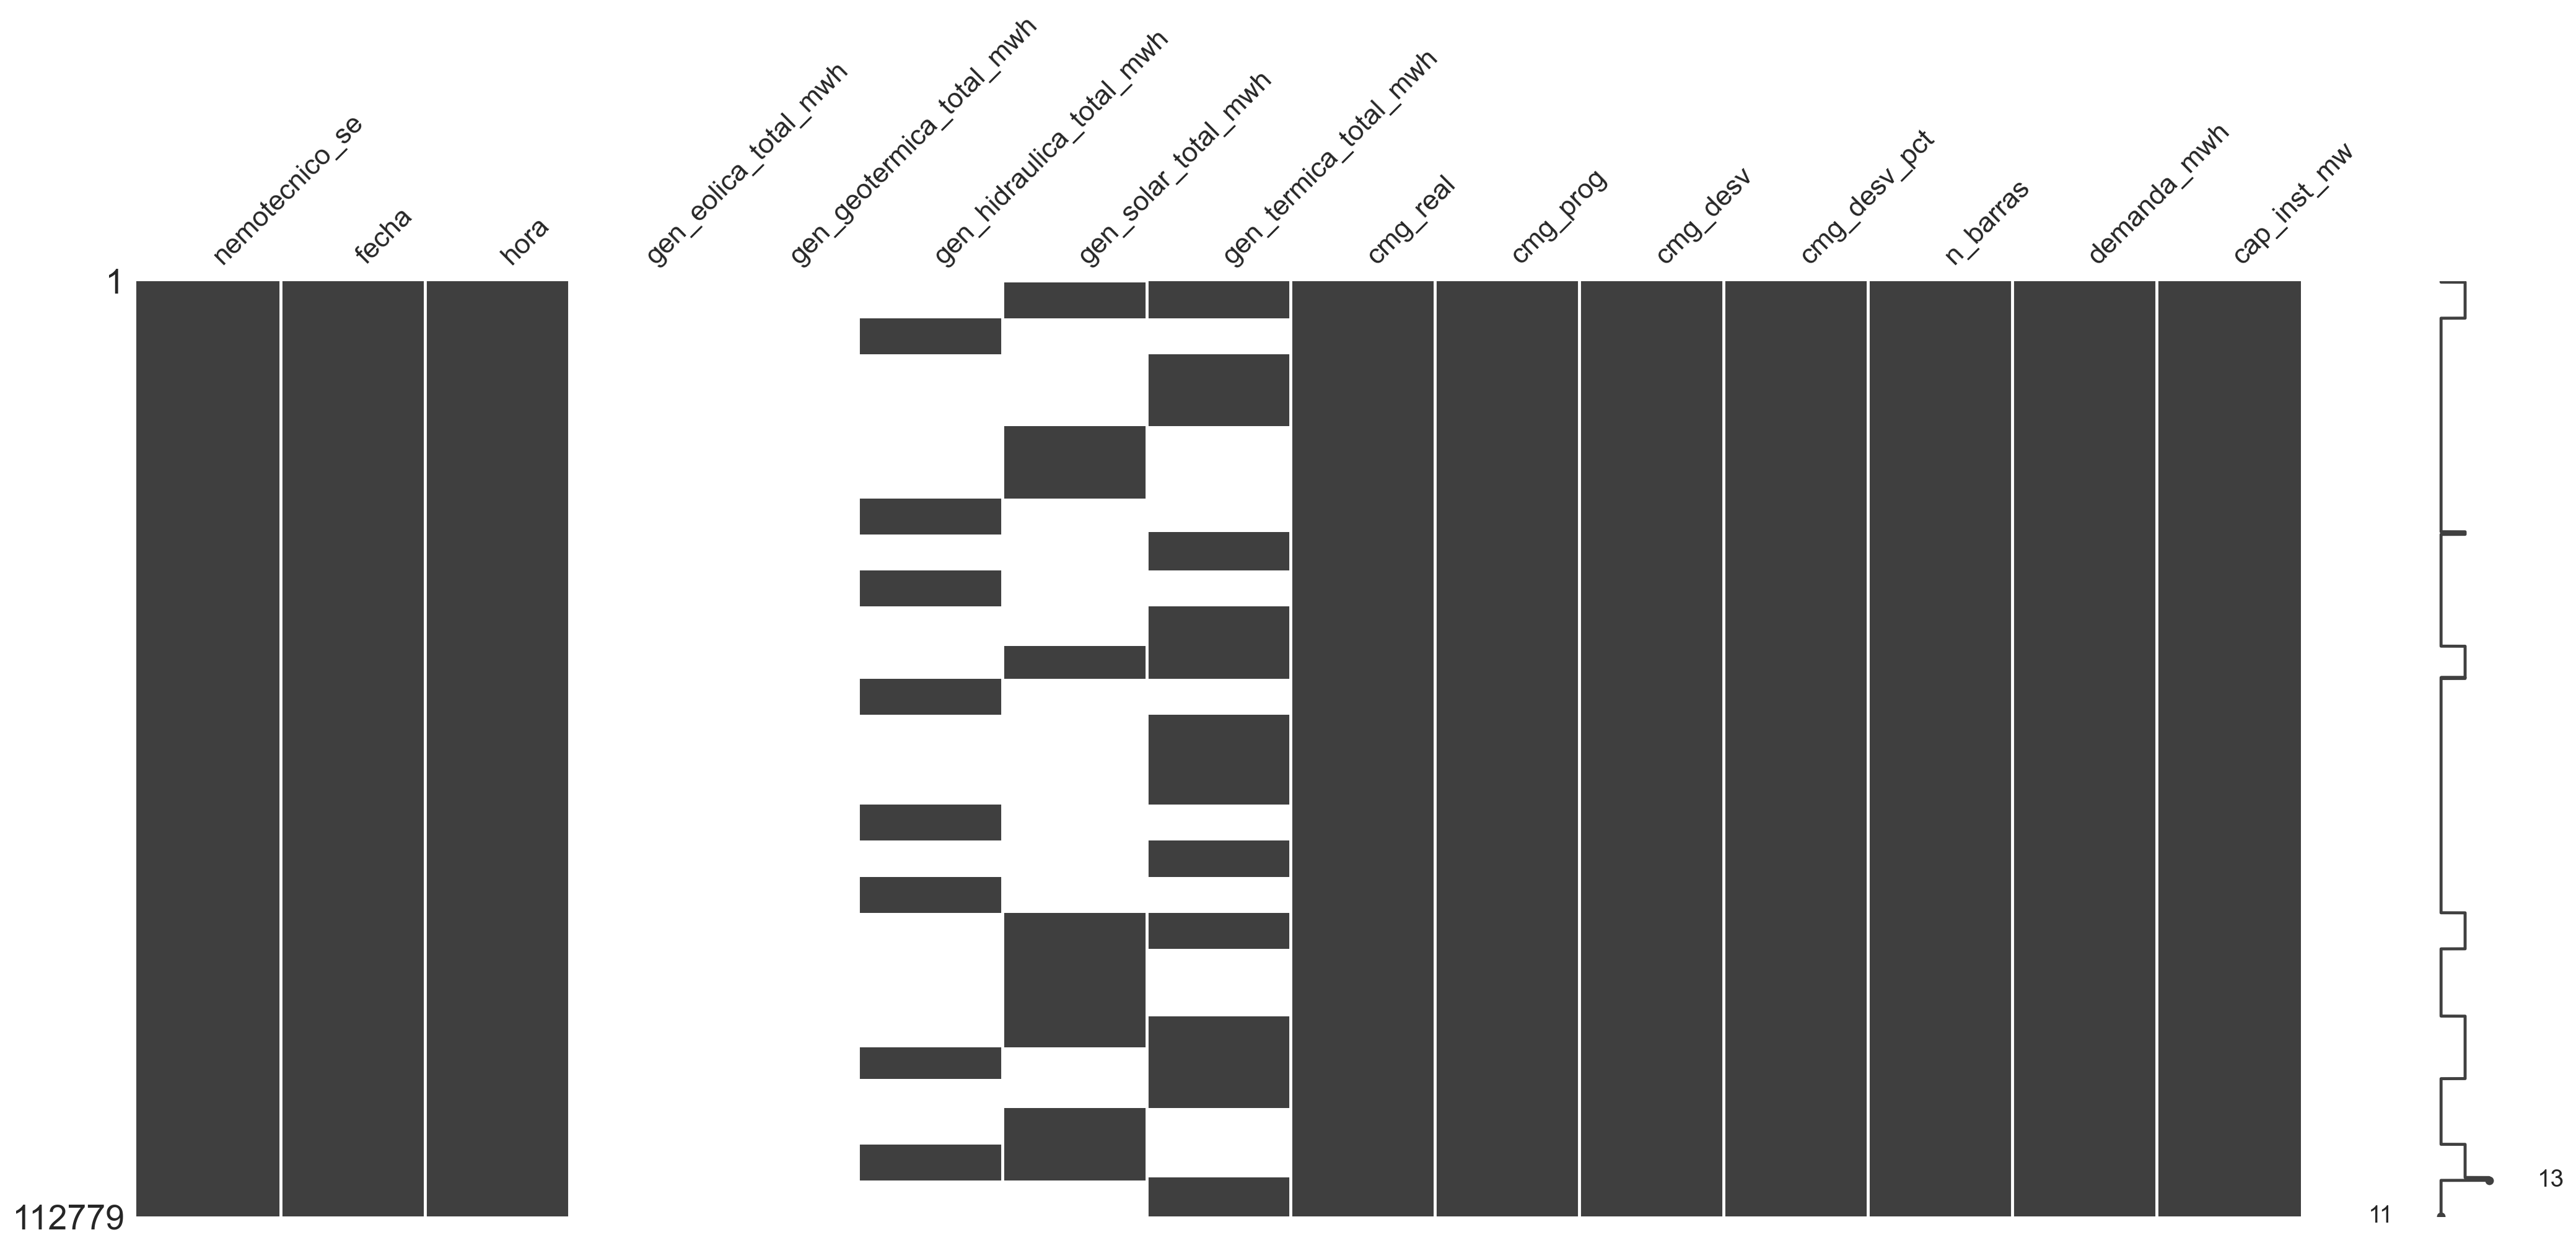

In [104]:
missingno.matrix(base_prediccion)

In [105]:
base_prediccion["fecha"] = pd.to_datetime(base_prediccion["fecha"])

In [111]:
base_prediccion['year'] = base_prediccion['fecha'].dt.year
base_prediccion['month'] = base_prediccion['fecha'].dt.month
base_prediccion['week'] = base_prediccion['fecha'].dt.week
base_prediccion['day'] = base_prediccion['fecha'].dt.day
base_prediccion['weekday'] = base_prediccion['fecha'].dt.day

# Ojo que weekday y weekend no seran independientes!
base_prediccion['is_weekend'] = np.where(base_prediccion['weekday'] >= 5, 1, 0)

In [112]:
base_prediccion.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,year,month,week,day,weekday,is_weekend
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,...,1.02,2,1210767,13.20785,2019,1,1,4,4,0
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,...,1.48,2,113232,13.20785,2019,1,1,4,4,0
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,...,-5.59,2,1089415,13.20785,2019,1,1,4,4,0
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,...,-67.77,2,1096867,13.20785,2019,1,1,4,4,0
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,...,-67.48,2,1071851,13.20785,2019,1,1,4,4,0


In [157]:
def plot_time_series(subestacion: str,
                     column: str,
                     fechas: List[str]) -> None:
    """Grafica series de tiempo para subestacion.

    :param subestacion: Subestacion de interes
    :type subestacion: str
    :param column: Columna a graficar
    :type column: str
    :param fechas: Lista de fechas a comparar
    :type fechas: List[str]
    :raises RuntimeError: Si no se encuentra la columna o no es numerica
    """
    if column not in base_prediccion:
        raise RuntimeError(f"La columna {column} no se encuentra en la base!")
        
    numeric_types = {np.dtype("float64"), np.dtype("int64")}
    if base_prediccion[column].dtype not in numeric_types:
        print(base_prediccion[column].dtype)
        raise RuntimeError(f"La columna {column} no es numérica!")
        
    subestacion_df = base_prediccion[base_prediccion["nemotecnico_se"] == subestacion]
    plt.figure()
    for fecha in fechas:
        mask = subestacion_df["fecha"] == fecha
        sub_fecha = subestacion_df[mask].sort_values(by="hora")
        plt.plot(sub_fecha["hora"], sub_fecha[column])
        plt.title(f"{column} para subestación {subestacion}")
        plt.xlabel("Hora")
        plt.ylabel(column)
        
    plt.legend(fechas)

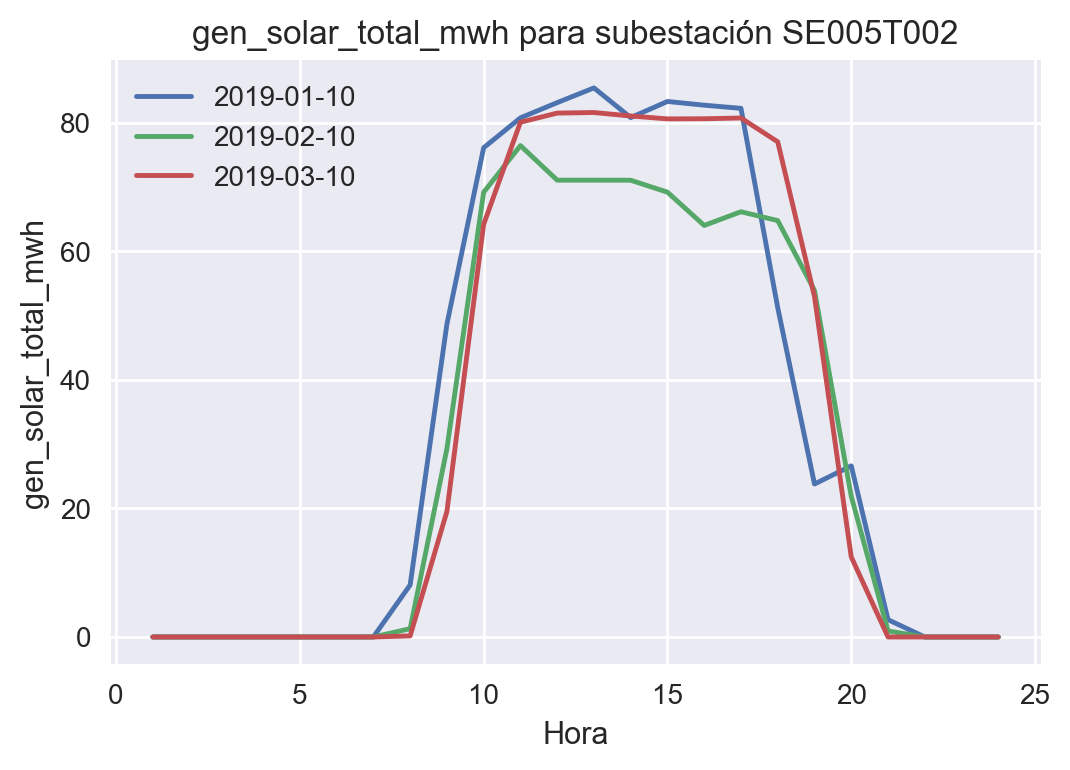

In [158]:
plot_time_series("SE005T002",
                 "gen_solar_total_mwh",
                 ["2019-01-10", "2019-02-10", "2019-03-10"])

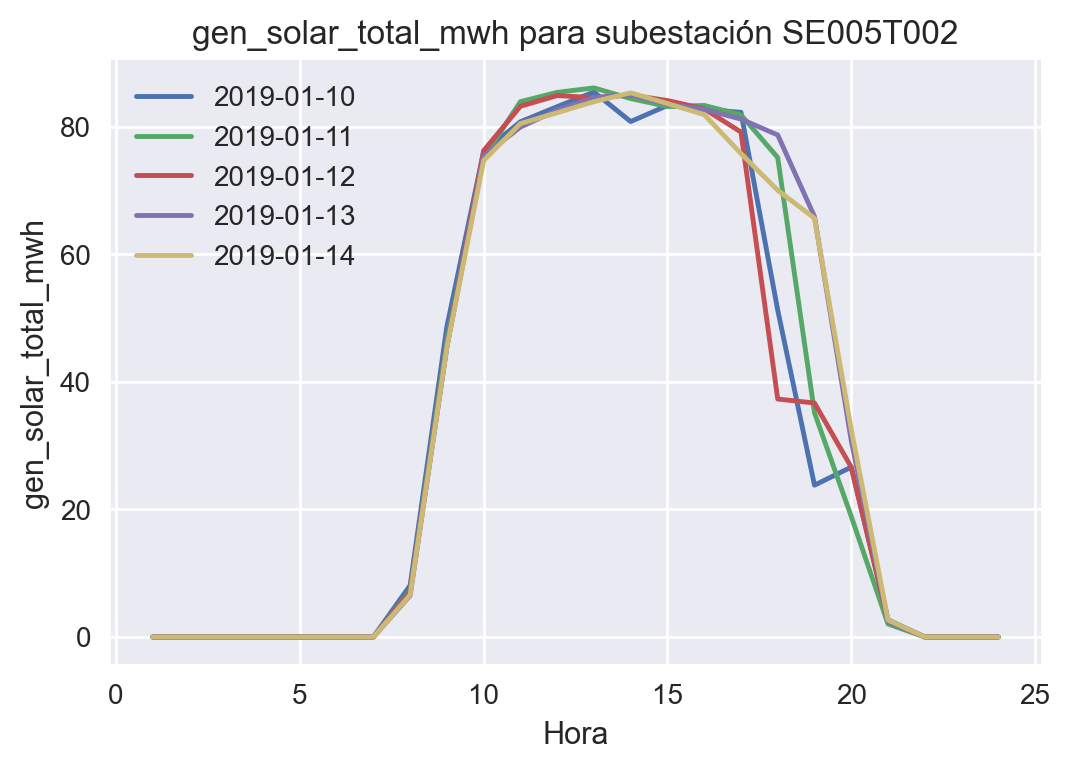

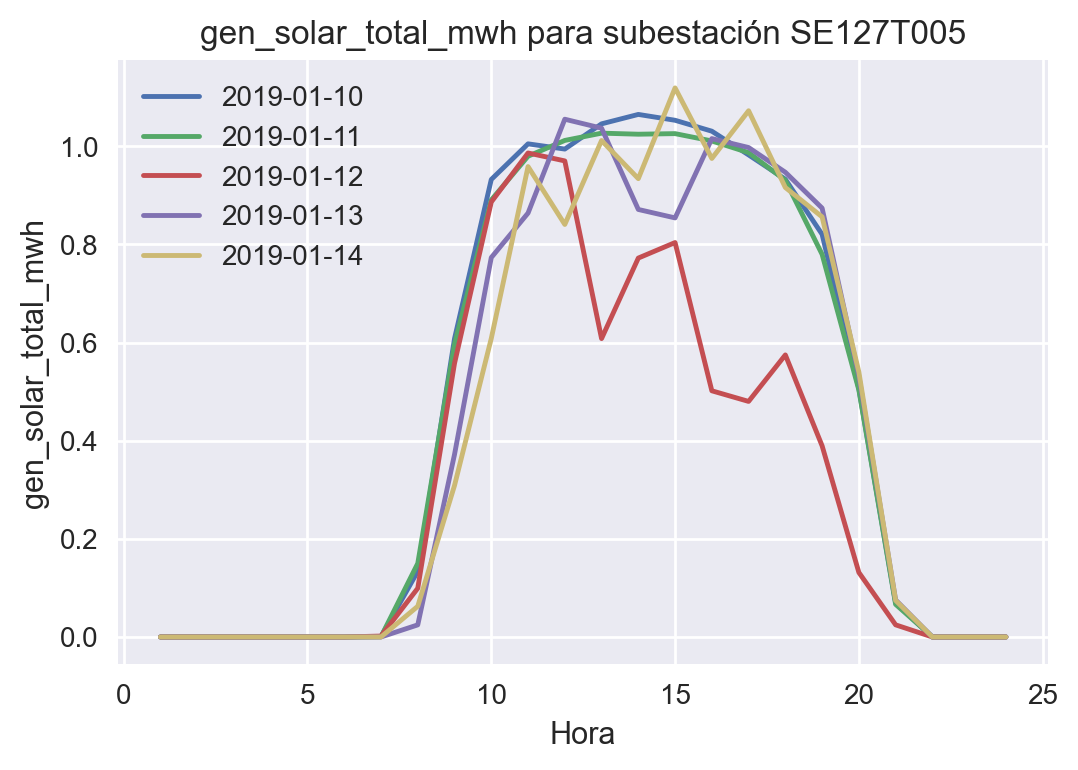

In [159]:
fechas = ["2019-01-10", "2019-01-11", "2019-01-12", "2019-01-13", "2019-01-14"]

plot_time_series("SE005T002",
                 "gen_solar_total_mwh",
                 fechas)

plot_time_series("SE127T005",
                 "gen_solar_total_mwh",
                 fechas)

### Comentarios

Bueno, un poco de historial mío, yo estudie ingeniería civil eléctrica, y estimación de demanda, o carga es un tema que vi en un par de cursos y recuerdo que el esquema clásico es modelar estas curvas con distribuciones típicas como por ejemplo Gaussiana, Weibull, entre otras (hasta exponencial en algunos casos si se ajusta bien). Los perfiles observados son los típicos de una generadora eléctrica. Finalmente, es esperable que la mayor cantidad de energía se genere entre medio día y 15 de la tarde, ya que son los momentos en que existe un peak energético en energía solar.

Respecto a las fechas en sí, lo relevante es que por alguna razón el 12 de enero algo ocurrió que hubo menos generación (quizás hubo alguna falla, o fue un día nublado por ejemplo).

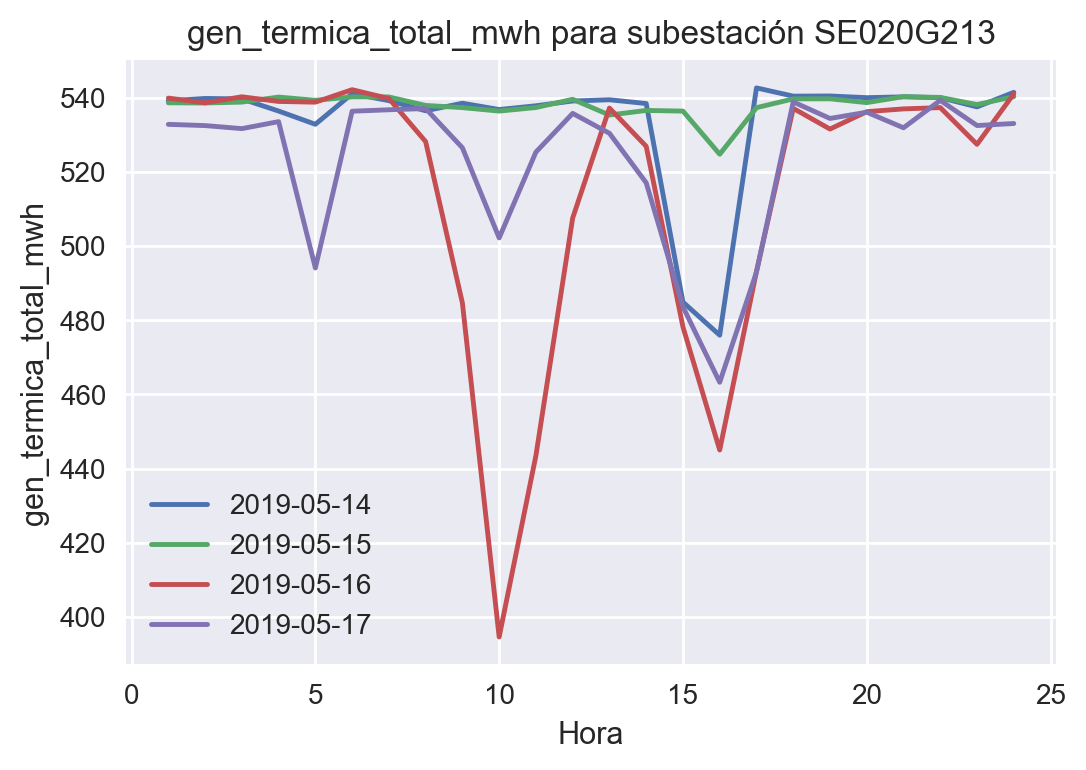

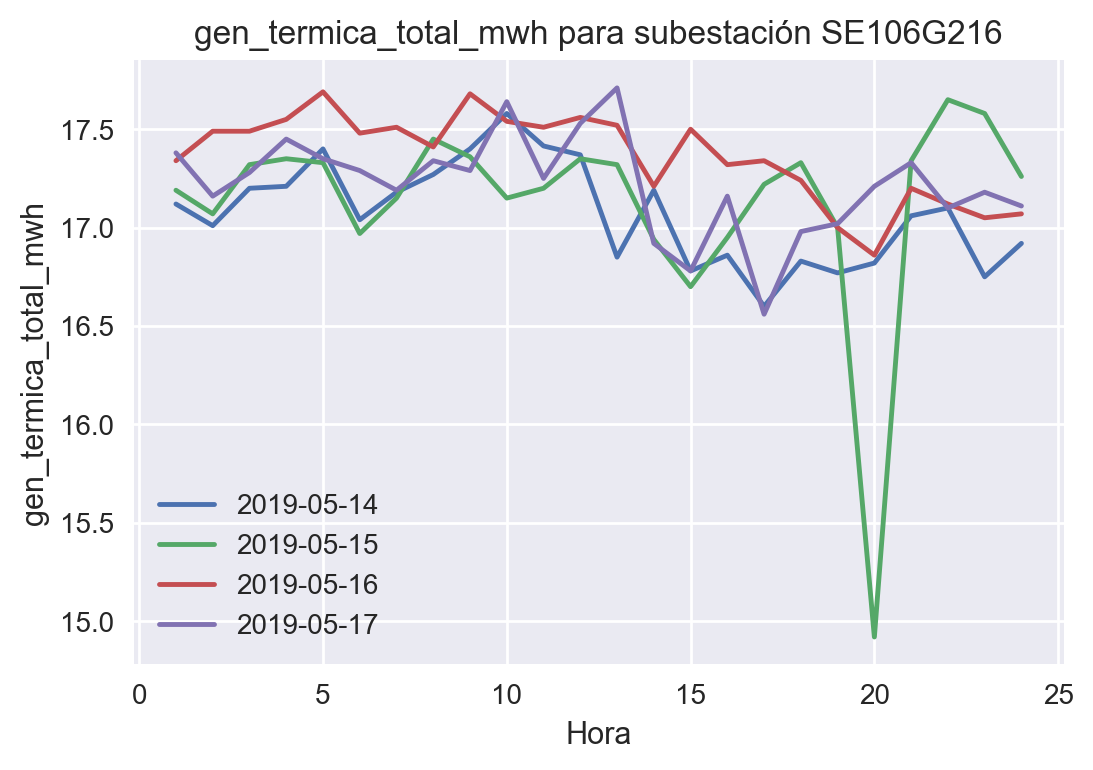

In [162]:
fechas = ["2019-05-14", "2019-05-15", "2019-05-16", "2019-05-17"]

plot_time_series("SE020G213",
                 "gen_termica_total_mwh",
                 fechas)

plot_time_series("SE106G216",
                 "gen_termica_total_mwh",
                 fechas)

### Comentarios

Existen días en que hay caídas considerables en la generación de energía, por ejemplo el 15 de mayo de 2019 para la subestación `SE106G216`, quizás hubo un fallo, o hubo mantención. De todas formas, dichas caídas pueden tener consecuencia, ya que el delta de potencia generada v/s potencia consumida puede afectar la calidad de suministro (por ejemplo aumentar o disminuir la frecuencia eléctrica en la red y/o tener transientes de voltaje que pueden afectar dispositivos), lo que puede afectar a usuarios y generar pérdidas no menores. Lo que se obseva entre las fechas, es que el perfil de generación debiese ser aproximadamente constante, sin embargo esto no ocurre así y ambas subestaciones tienen caídas considerables de generación.

### Modelo 1

Supuesto, donde los datos son `NaN`, se considerará que es 0 la generación (o que no existe, por ende 0), en un caso real este supuesto debería confirmarlo con el interesado (cliente, persona interesada, _stakeholder_, o cualquier nombre que se le quiera dar).

Como el modelo considera una ventana temporal de 1 hora, se puede usar toda la información relevante hasta antes de esa hora, o ventanas de periodos $\tau$. La variable `target` deberá modificarse para considerar los features hasta antes la ventana de interés. Por otro lado, existirá un hiper-parámetro $k$ que servirá para generar $kT$ características temporales, donde $T$ es la cantidad de características a considerar en una ventana de tiempo (por ejemplo generación total, etc).

### Primera aproximación: 1 sola subestación

In [226]:
base_prediccion["target"] = np.where(np.abs(base_prediccion["cmg_desv_pct"]) <= 15, 0, 1)

In [227]:
base_prediccion.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'year', 'month', 'week', 'day', 'weekday', 'is_weekend', 'target',
       'en_total_mwh'],
      dtype='object')

In [228]:
base_prediccion[["cmg_desv_pct", "target"]].head()

,cmg_desv_pct,target
0,1.02,0
1,1.48,0
2,-5.59,0
3,-67.77,1
4,-67.48,1


In [229]:
base_prediccion["en_total_mwh"] = (
    base_prediccion["gen_eolica_total_mwh"].fillna(0)
    + base_prediccion["gen_hidraulica_total_mwh"].fillna(0)
    + base_prediccion["gen_solar_total_mwh"].fillna(0)
    + base_prediccion["gen_termica_total_mwh"].fillna(0)
)

In [230]:
base_prediccion_sorted = base_prediccion.sort_values(by=["fecha", "nemotecnico_se"])

In [231]:
subestaciones = base_prediccion_sorted["nemotecnico_se"].unique()
subestaciones

array(['SE001T002', 'SE003T011', 'SE004L079', 'SE004T002', 'SE005R002',
       'SE005T002', 'SE005T003', 'SE008G010', 'SE009G004', 'SE009T002',
       'SE014T002', 'SE015R002', 'SE019T002', 'SE028T002', 'SE036T002',
       'SE039R002', 'SE055T002', 'SE055T005', 'SE067T005', 'SE071T005',
       'SE081T005', 'SE082T005', 'SE106G216', 'SE123G216', 'SE127T005',
       'SE170T005', 'SE031G216', 'SE103L123', 'SE020G213'], dtype=object)

In [232]:
sub_SE001T002 = base_prediccion_sorted[base_prediccion_sorted["nemotecnico_se"] == "SE001T002"]
sub_SE001T002.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,demanda_mwh,cap_inst_mw,year,month,week,day,weekday,is_weekend,target,en_total_mwh
120,SE001T002,2019-01-01 00:00:00+00:00,1,NaN,NaN,NaN,0.0,0.0,54.03,124.604410,...,61148556,14.2881,2019,1,1,1,1,0,1,0.0
121,SE001T002,2019-01-01 00:00:00+00:00,2,NaN,NaN,NaN,0.0,0.0,54.03,125.415516,...,136880002,14.2881,2019,1,1,1,1,0,1,0.0
122,SE001T002,2019-01-01 00:00:00+00:00,3,NaN,NaN,NaN,0.0,0.0,54.03,52.383209,...,127833826,14.2881,2019,1,1,1,1,0,0,0.0
123,SE001T002,2019-01-01 00:00:00+00:00,4,NaN,NaN,NaN,0.0,0.0,54.03,53.482023,...,133924965,14.2881,2019,1,1,1,1,0,0,0.0
124,SE001T002,2019-01-01 00:00:00+00:00,5,NaN,NaN,NaN,0.0,0.0,54.03,52.260469,...,138980453,14.2881,2019,1,1,1,1,0,0,0.0


In [233]:
import itertools


def create_feature_names(features: List[str]) -> List[str]:
    """Crea nombres de caracteristicas para datos agregados.

    :param features: Features a considerar.
    :type features: List[str]
    :return: Lista de features con sufijos de agregados
    :rtype: List[str]
    """
    agg = ["_min", "_mean", "_max"]
    return ["".join(s[::-1]) for s in itertools.product(agg, features)]


features = ["demanda_mwh", "en_total_mwh"]

other_features_df = sub_SE001T002[[
    "n_barras",
    "cap_inst_mw",
    "month",
    "week",
    "day",
    "is_weekend",
    "target"]]

# Hiperparámetro
width = 3
shifted = sub_SE001T002[features].shift(width - 1)
window = shifted.rolling(window=width)
sub_SE001T002_feat = pd.concat([window.min(), window.mean(), window.max(), other_features_df], axis=1)
sub_SE001T002_feat.columns = create_feature_names(features) + list(other_features_df.columns)

In [235]:
df_features = sub_SE001T002_feat.dropna()

In [237]:
df_features.head()

,demanda_mwh_min,en_total_mwh_min,demanda_mwh_mean,en_total_mwh_mean,demanda_mwh_max,en_total_mwh_max,n_barras,cap_inst_mw,month,week,day,is_weekend,target
124,61148556.0,0.0,1.086208e+08,0.0,136880002.0,0.0,2,14.2881,1,1,1,0,0
125,127833826.0,0.0,1.328796e+08,0.0,136880002.0,0.0,2,14.2881,1,1,1,0,0
126,127833826.0,0.0,1.335797e+08,0.0,138980453.0,0.0,2,14.2881,1,1,1,0,0
127,133369059.0,0.0,1.354248e+08,0.0,138980453.0,0.0,2,14.2881,1,1,1,0,1
128,132296692.0,0.0,1.348821e+08,0.0,138980453.0,0.0,2,14.2881,1,1,1,0,0


In [236]:
df_features.shape

(4341, 13)

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    df_features.loc[:, "demanda_mwh_min":"is_weekend"], df_features["target"], test_size=.3)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_train_scaled.head()

,demanda_mwh_min,en_total_mwh_min,demanda_mwh_mean,en_total_mwh_mean,demanda_mwh_max,en_total_mwh_max,n_barras,cap_inst_mw,month,week,day,is_weekend
0,-0.654059,0.475723,-0.035586,0.414490,0.324722,0.297753,0.0,1.0,-0.880837,-0.744654,0.502306,0.385464
1,0.628881,-0.198471,0.326072,-0.261028,0.063620,-0.288708,0.0,1.0,0.287970,0.058087,-1.558625,-2.594278
2,-0.663568,-0.198471,-1.023599,-0.261028,-0.961999,-0.288708,0.0,1.0,-1.465240,-1.547395,-0.986144,0.385464
3,-0.669403,0.700455,-1.023750,0.541947,-0.960859,0.421218,0.0,1.0,-1.465240,-1.413605,0.502306,0.385464
4,-0.726239,-0.198471,-1.048356,-0.261028,-0.964410,-0.288708,0.0,1.0,-1.465240,-1.146025,1.647267,0.385464


[Text(0.5, 1.0, 'Validación')]

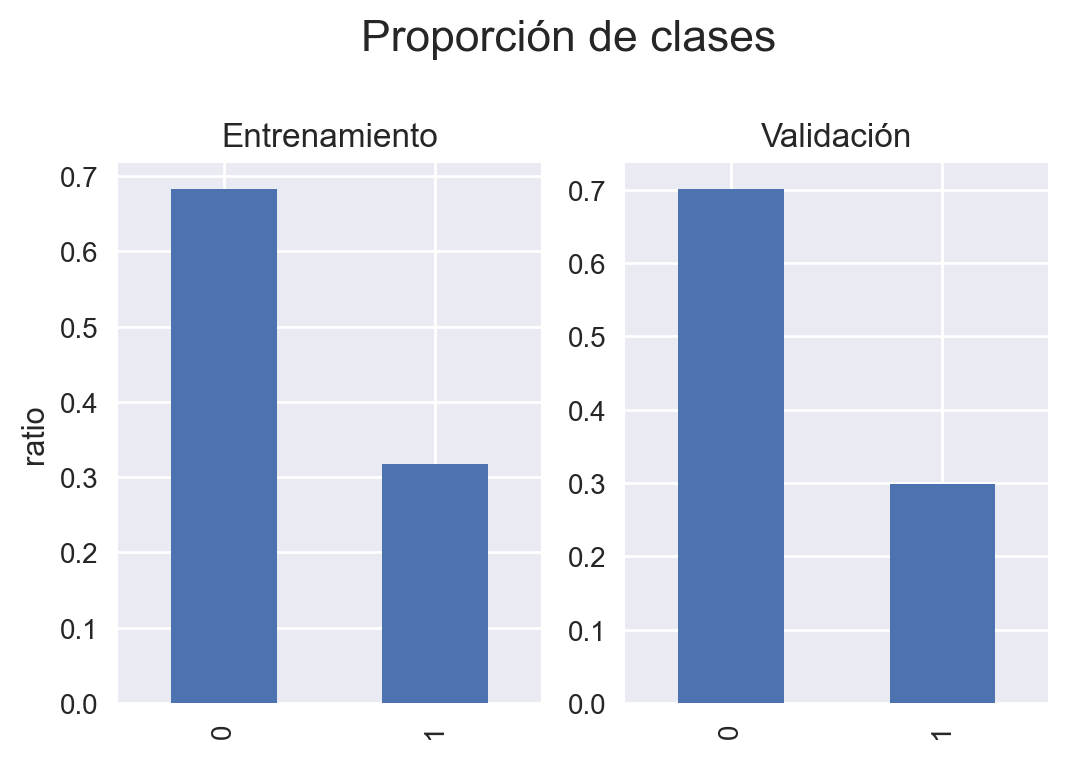

In [241]:
fig, axs = plt.subplots(1, 2)
fig.subplots_adjust(top=0.8)
fig.suptitle("Proporción de clases", fontsize=16)
pd.Series(y_train).value_counts(normalize=True, sort=False).plot.bar(ax=axs[0])
axs[0].set(ylabel="ratio", title="Entrenamiento")
pd.Series(y_test).value_counts(normalize=True, sort=False).plot.bar(ax=axs[1])
axs[1].set(title="Validación")

In [252]:
model = LogisticRegression().fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1].round(2)

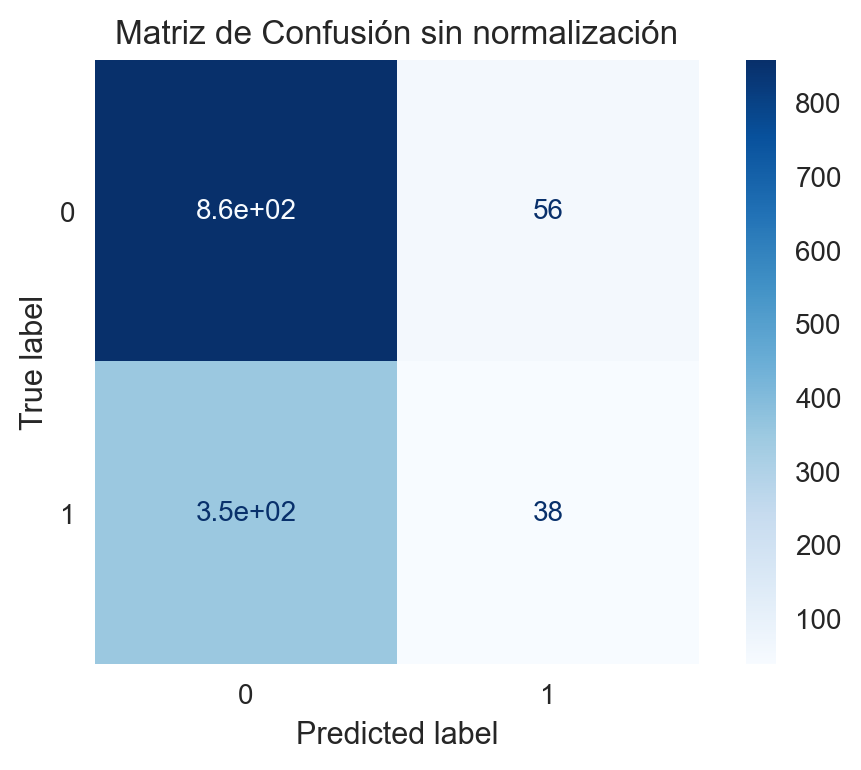

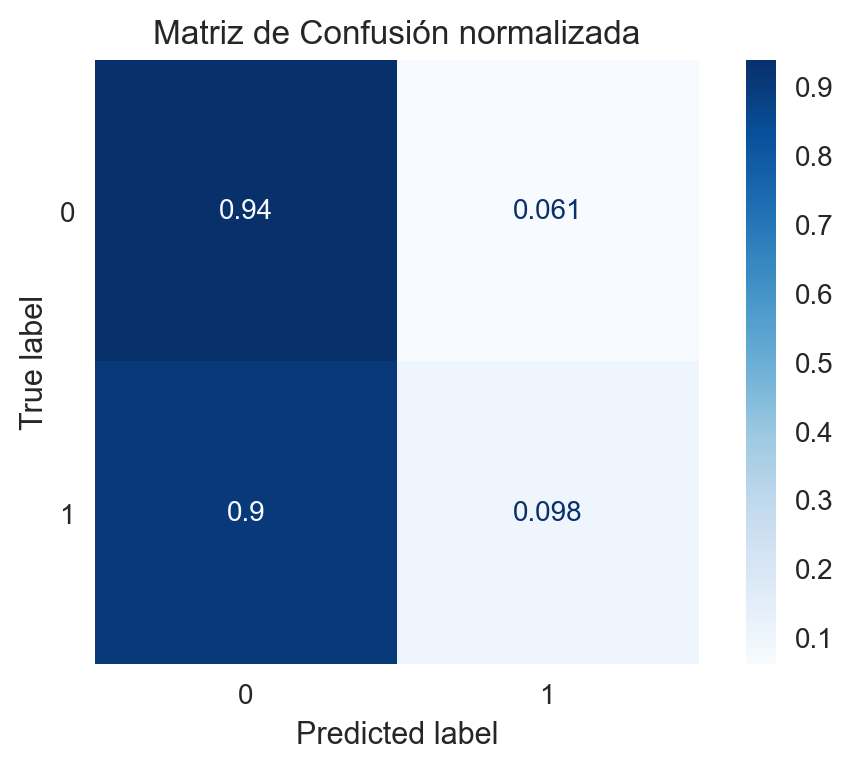

In [253]:
from sklearn.metrics import plot_confusion_matrix


titles_options = [("Matriz de Confusión sin normalización", None),
                  ("Matriz de Confusión normalizada", "true")]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test_scaled, y_test,
                                display_labels=(0, 1),
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.grid(False)
    disp.ax_.set_title(title)

In [254]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       914
           1       0.40      0.10      0.16       389

    accuracy                           0.69      1303
   macro avg       0.56      0.52      0.48      1303
weighted avg       0.62      0.69      0.61      1303



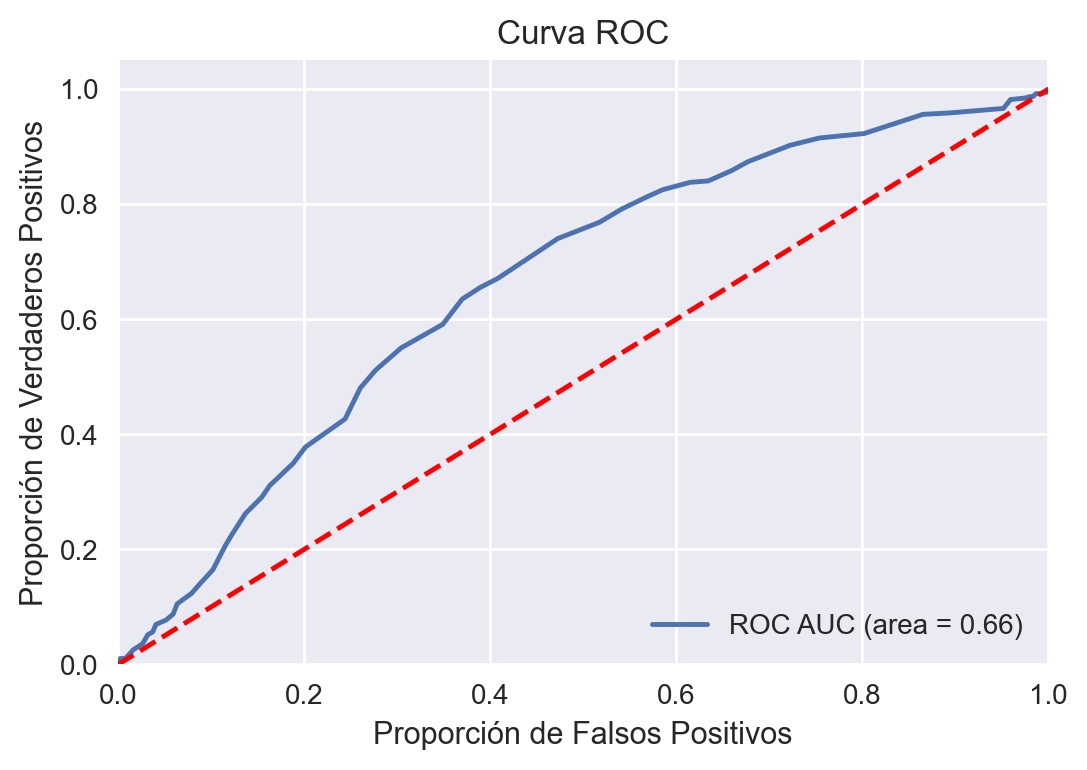

In [255]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fp, tp, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fp, tp)

plt.plot(fp, tp, label=f"ROC AUC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="r", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proporción de Falsos Positivos")
plt.ylabel("Proporción de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")

In [257]:
!pip install yellowbrick

     |████████████████████████████████| 263 kB 2.5 MB/s eta 0:00:01


/Users/dpalma/.pyenv/versions/desafio/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dpalma/.pyenv/versions/desafio/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


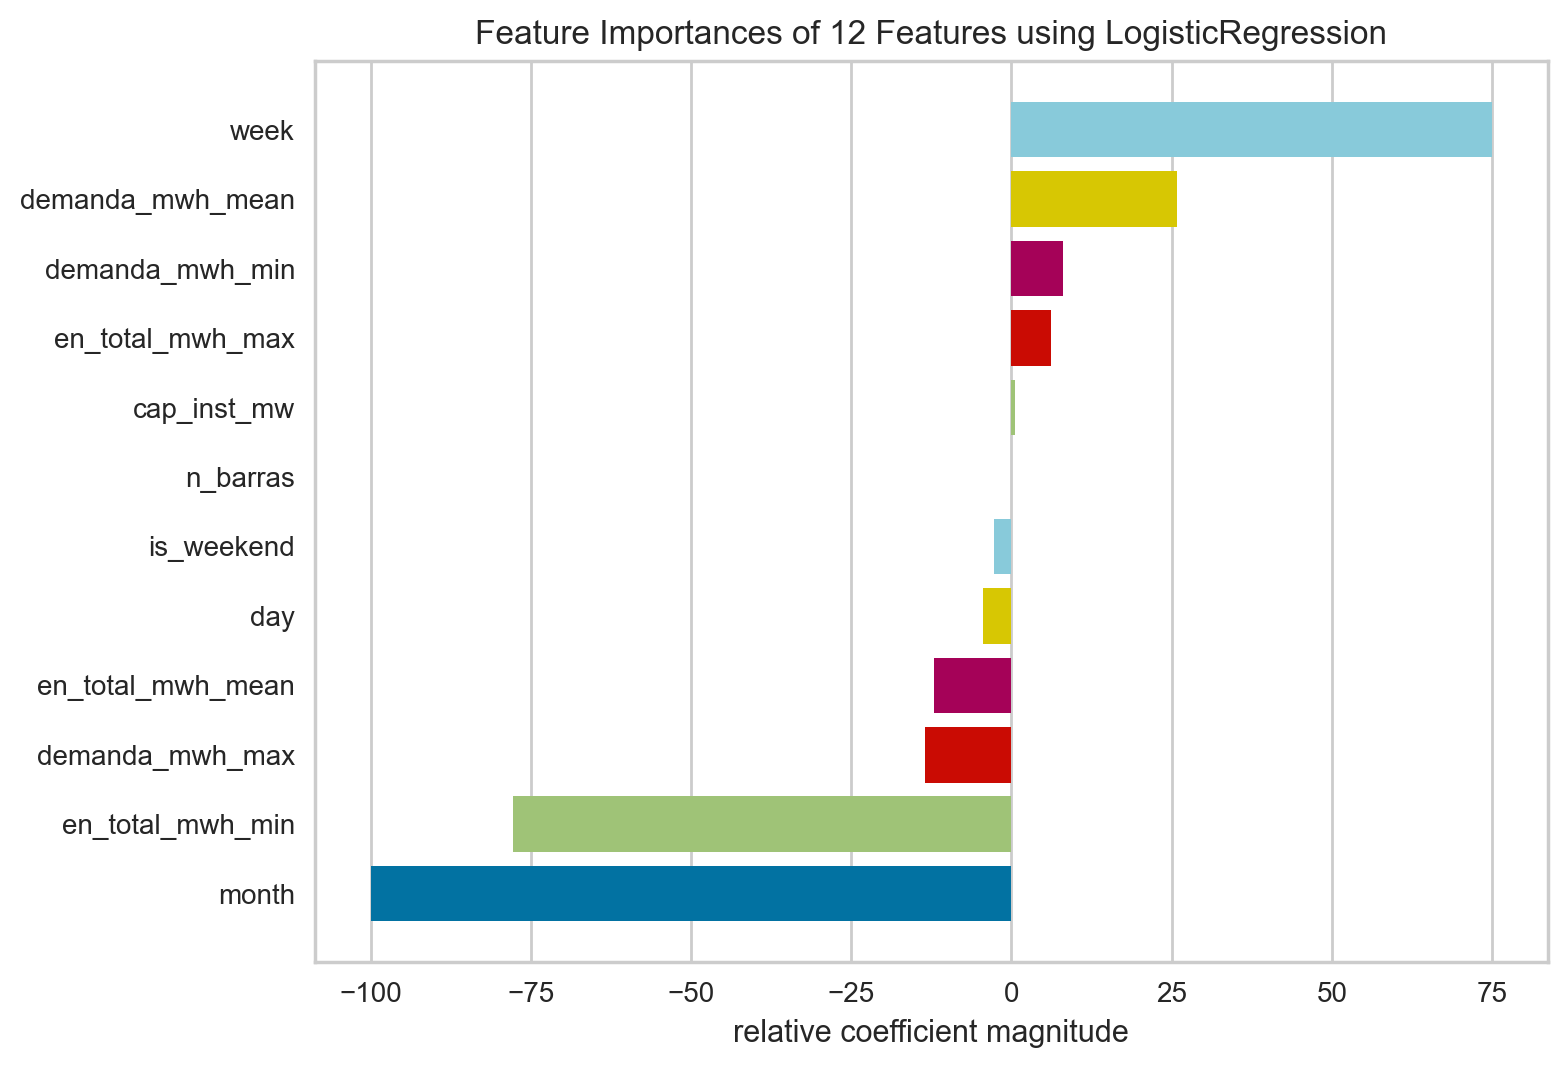

In [262]:
from yellowbrick.model_selection import FeatureImportances

model = LogisticRegression()
viz = FeatureImportances(model)
viz.fit(X_train_scaled, y_train)
viz.show()

### Comentarios

El problema se está tratando como predecir si la desviación del costo marginal estará fuera de rango o no. Esto se podría modelar como una variable de Bernoulli, en esencia, un evento ocurre o no ocurre. Nos interesaría estimar probabilidades de ocurrencia del evento, por ello utilizamos métricas de precisión, sensibilidad y exactitud. Por otro lado, como observamos que el conjunto de datos está desbalanceado (no es un desbalance severo), también consideramos la métrica F1-score que es en esencia un promedio ponderado de la precisión y sensibilidad (recall). En resumen:

* La exactitud nos indica qué tan bien en general nuestro modelo predice el resultado.
* La precisión indica qué tan bien predice una clase de interés, en este caso consideramos cuando el evento ocurre. En palabras simples, se intenta responder a la pregunta: De los eventos que se clasificaron como que ocurrieron, cuántos realmente ocurrieron?
* La sensibilidad (recall), intenta responder a la pregunta: De los eventos que ocurrieron, cuántos se lograron predecir?

Dependiendo del costo (monetarios en este caso) de los falsos positivos/falsos negativos, es que se deberá optimizar ya sea la precision, recall o ambas. 

Por otro lado también graficamos la curva ROC, que nos entrega una medida de certeza de nuestro clasificador. En general, la curva ROC no es adecuada si existe un desbalance considerable, pero en este caso no es tan severo, por lo que no utilizaremos la curva de precision-recall (que se utiliza en los casos mencionados). Obtenemos un AUC 0.66, que podemos interpretar como la probabilidad de que predecir una clase como positiva, sea en efecto positiva.

También se muestra un gráfico de importancia relativa de predictores, considerando los coeficientes de la regresión logística (se escalaron los predictores, sólo para poder hacer esta comparación). Se observa que entre las variables más relevantes se encuentran el mes, la semana, la demanda promedio y el mínimo de energía generada en la ventana de tiempo considerada.

In [263]:
model = LogisticRegression(class_weight="balanced").fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1].round(2)

<Figure size 800x800 with 0 Axes>

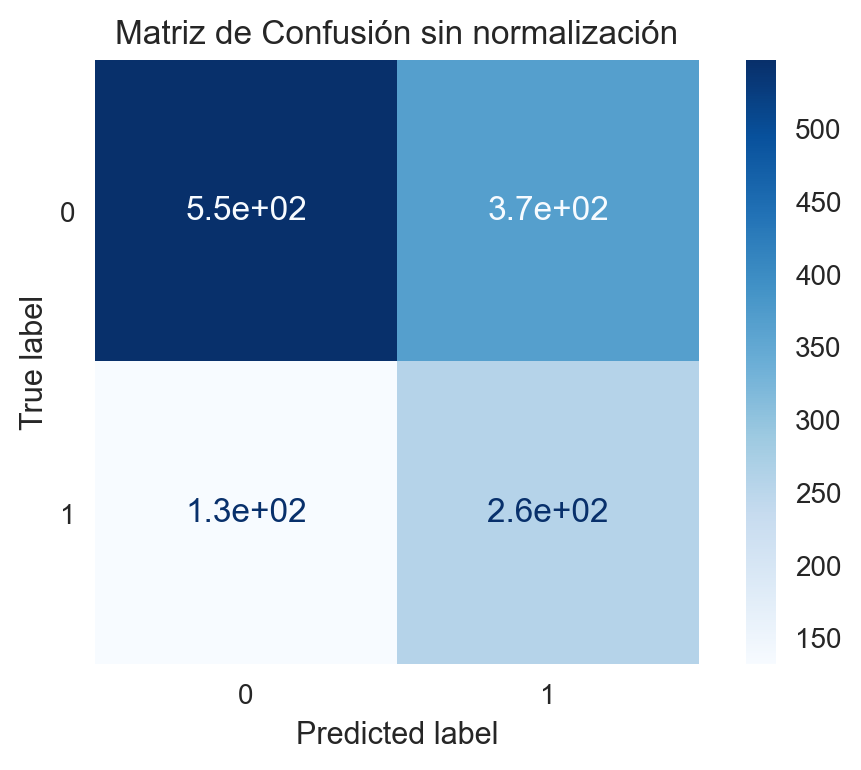

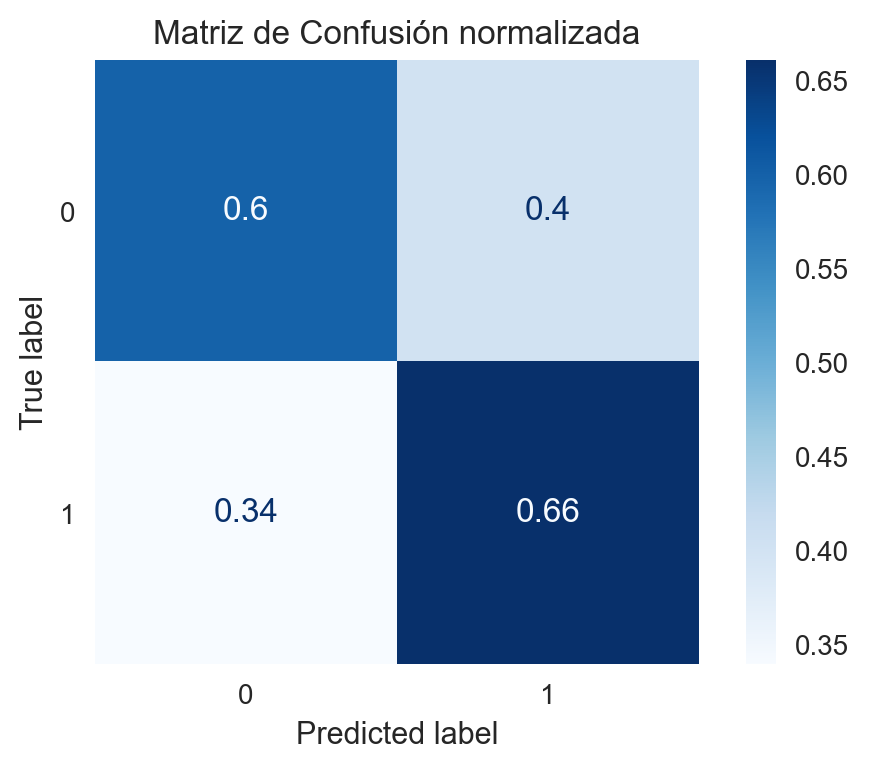

In [267]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 200

plt.figure(figsize=(4,4))


for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test_scaled, y_test,
                                display_labels=(0, 1),
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.grid(False)
    disp.ax_.set_title(title)

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       914
           1       0.41      0.66      0.51       389

    accuracy                           0.62      1303
   macro avg       0.61      0.63      0.60      1303
weighted avg       0.69      0.62      0.63      1303



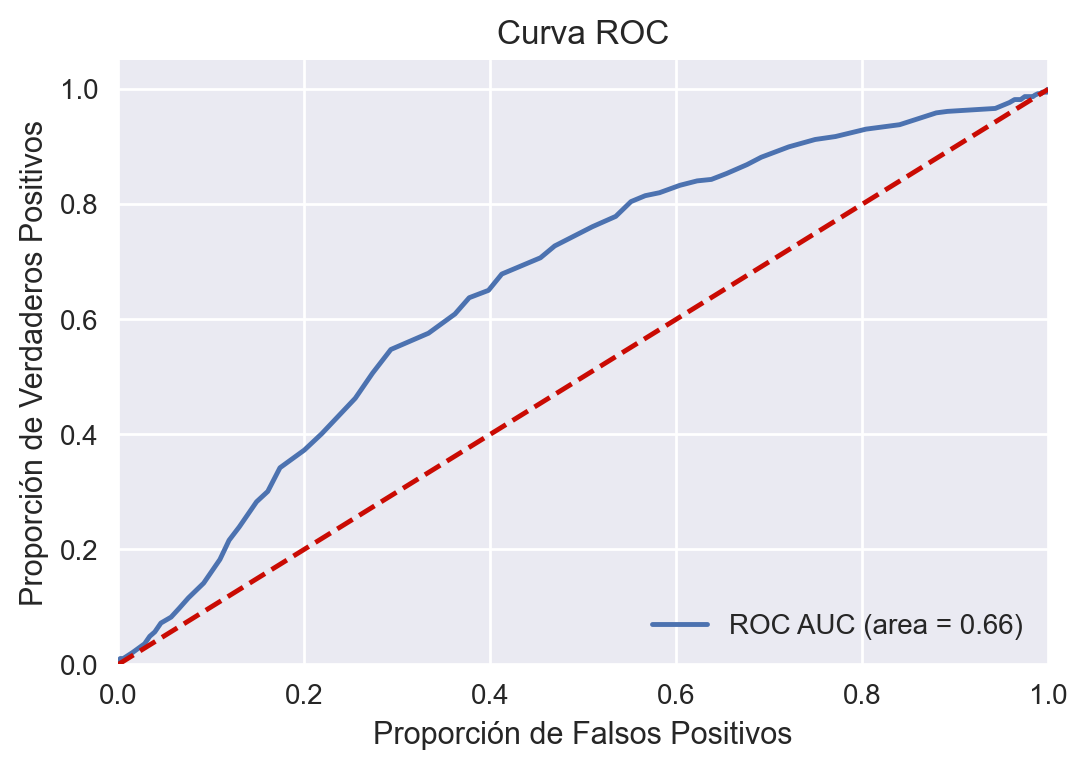

In [269]:
fp, tp, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fp, tp)

plt.plot(fp, tp, label=f"ROC AUC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="r", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proporción de Falsos Positivos")
plt.ylabel("Proporción de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")

/Users/dpalma/.pyenv/versions/desafio/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dpalma/.pyenv/versions/desafio/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


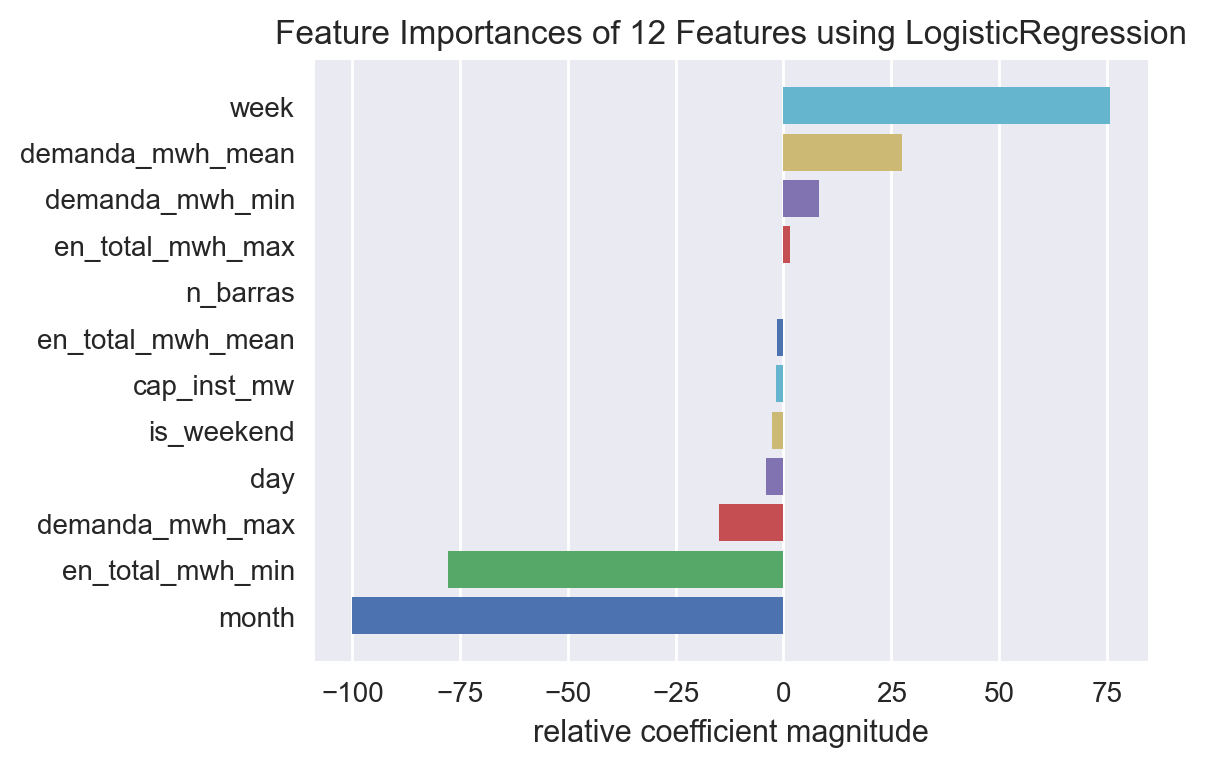

In [270]:
model = LogisticRegression(class_weight="balanced")
viz = FeatureImportances(model)
viz.fit(X_train_scaled, y_train)
viz.show()

### Comentarios

Utilizando ponderadores con la probabilidad apriori de cada evento (class_balanced), logramos mover un poco el recall de la clase positiva, a costo de reducir la precisión y recall de la clase negativa. Dependiendo del intercambio que haya en esto (como impacte al costo monetario, u otra variable de interés), este podría ser un mejor modelo que el anterior, ya que tiene una mejor sensibilidad y precision para la clase positiva.

## Observaciones

El análisis que hemos hecho hasta ahora tiene algunas desventajas. No estamos aprovechando que tenemos información de otras subestaciones, que se podrían utilizar para generalizar e inferir mejor el evento de interés.

In [272]:
def feature_extraction_se(subestacion: str) -> pd.DataFrame:
    """Extrae features de una subestacion.

    :param subestacion: Nombre de subestacion
    :type subestacion: str
    :return: Features agregadas a 2 horas
    :rtype: pd.DataFrame
    """
    sub = base_prediccion_sorted[base_prediccion_sorted["nemotecnico_se"] ==
                                 subestacion]
    features = ["demanda_mwh", "en_total_mwh"]

    other_features_df = sub[[
        "n_barras", "cap_inst_mw", "month", "week", "day", "is_weekend",
        "target"
    ]]

    # Hiperparámetro
    width = 3
    shifted = sub[features].shift(width - 1)
    window = shifted.rolling(window=width)
    sub_feat = pd.concat(
        [window.min(),
         window.mean(),
         window.max(), other_features_df], axis=1)
    sub_feat.columns = create_feature_names(features) + list(
        other_features_df.columns)
    return sub_feat.dropna()

In [276]:
all_sub = pd.DataFrame()
for sub in subestaciones:
    all_sub = all_sub.append(feature_extraction_se(sub))

In [279]:
all_sub.head()

,demanda_mwh_min,en_total_mwh_min,demanda_mwh_mean,en_total_mwh_mean,demanda_mwh_max,en_total_mwh_max,n_barras,cap_inst_mw,month,week,day,is_weekend,target
124,61148556.0,0.0,1.086208e+08,0.0,136880002.0,0.0,2,14.2881,1,1,1,0,0
125,127833826.0,0.0,1.328796e+08,0.0,136880002.0,0.0,2,14.2881,1,1,1,0,0
126,127833826.0,0.0,1.335797e+08,0.0,138980453.0,0.0,2,14.2881,1,1,1,0,0
127,133369059.0,0.0,1.354248e+08,0.0,138980453.0,0.0,2,14.2881,1,1,1,0,1
128,132296692.0,0.0,1.348821e+08,0.0,138980453.0,0.0,2,14.2881,1,1,1,0,0


In [280]:
X_train, X_test, y_train, y_test = train_test_split(
    all_sub.loc[:, "demanda_mwh_min":"is_weekend"], all_sub["target"], test_size=.3)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_train_scaled.head()

,demanda_mwh_min,en_total_mwh_min,demanda_mwh_mean,en_total_mwh_mean,demanda_mwh_max,en_total_mwh_max,n_barras,cap_inst_mw,month,week,day,is_weekend
0,-0.130319,-0.275928,-0.154829,-0.280940,-0.146500,-0.283098,-0.251862,-0.609342,-0.898385,-0.896106,-0.289318,0.396029
1,-0.142654,-0.106509,-0.174110,-0.131944,-0.165384,-0.153860,0.517032,-0.236481,-0.306625,-0.081399,1.539625,0.396029
2,-0.144028,-0.176077,-0.173910,-0.198776,-0.163071,-0.217542,-1.020756,2.804978,-1.490145,-1.303460,1.311007,0.396029
3,-0.128269,-0.319171,-0.160832,-0.335695,-0.154791,-0.347692,-0.251862,-0.704820,1.468655,1.140661,-1.661025,-2.525071
4,-0.137640,2.013280,-0.169744,1.907084,-0.162033,1.794078,-1.020756,2.804978,0.285135,0.325954,0.625154,0.396029


[Text(0.5, 1.0, 'Validación')]

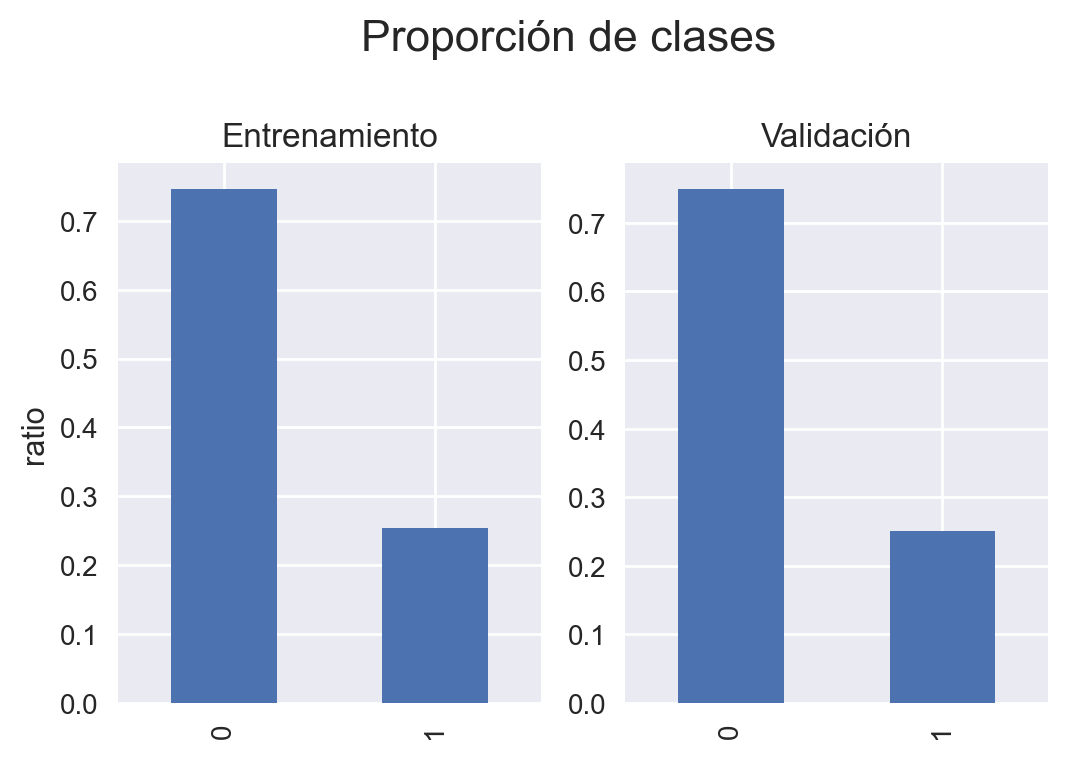

In [281]:
fig, axs = plt.subplots(1, 2)
fig.subplots_adjust(top=0.8)
fig.suptitle("Proporción de clases", fontsize=16)
pd.Series(y_train).value_counts(normalize=True, sort=False).plot.bar(ax=axs[0])
axs[0].set(ylabel="ratio", title="Entrenamiento")
pd.Series(y_test).value_counts(normalize=True, sort=False).plot.bar(ax=axs[1])
axs[1].set(title="Validación")

In [285]:
model = LogisticRegression(class_weight="balanced").fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1].round(2)

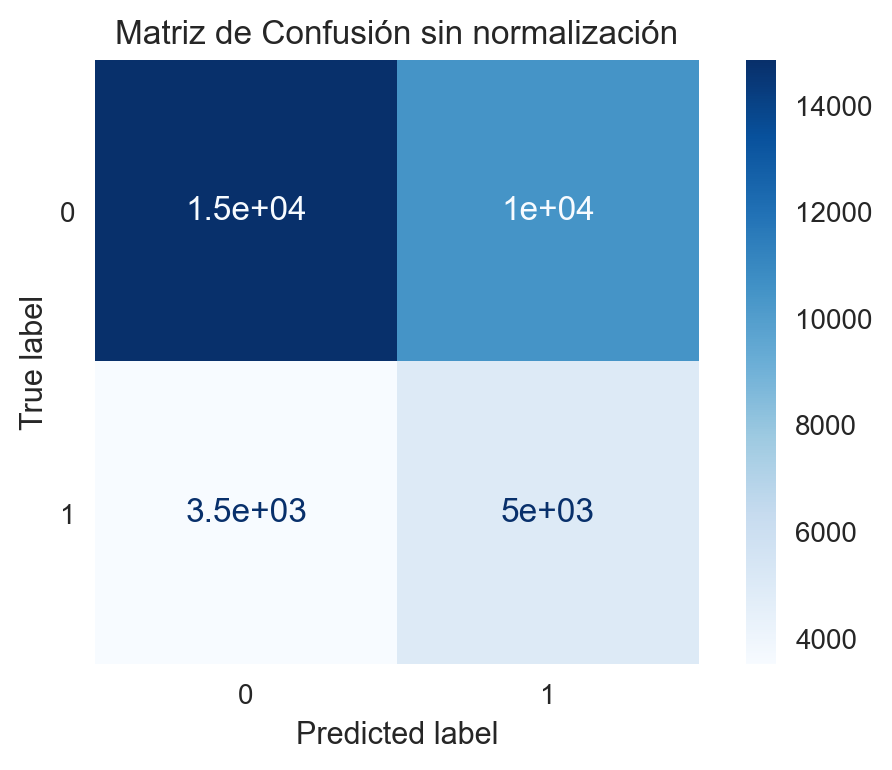

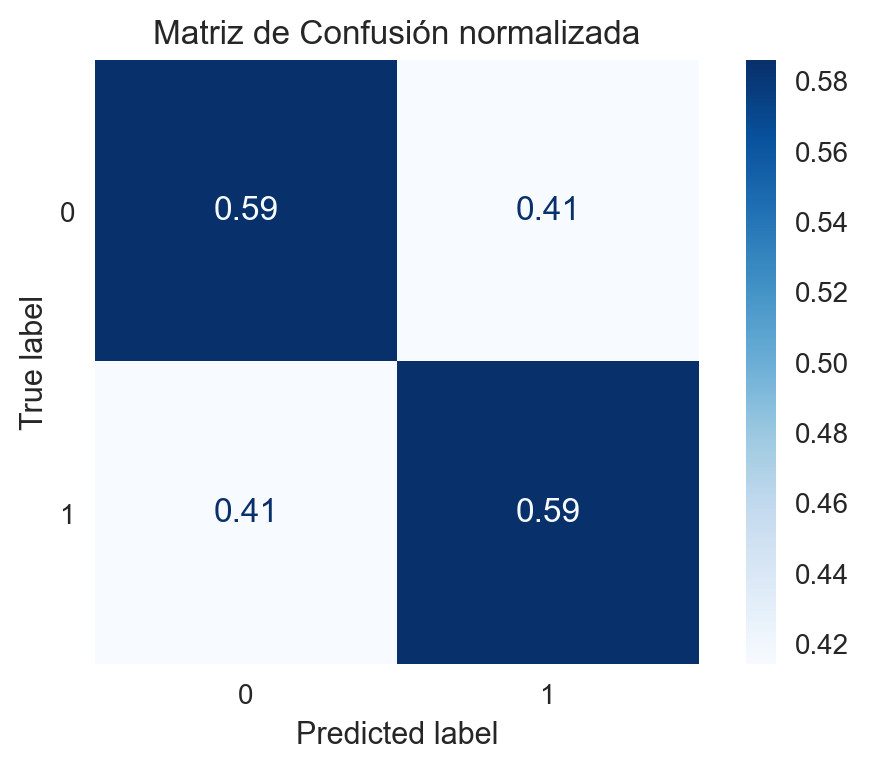

In [286]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test_scaled, y_test,
                                display_labels=(0, 1),
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.grid(False)
    disp.ax_.set_title(title)

In [287]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68     25331
           1       0.32      0.59      0.41      8468

    accuracy                           0.59     33799
   macro avg       0.56      0.59      0.55     33799
weighted avg       0.69      0.59      0.61     33799



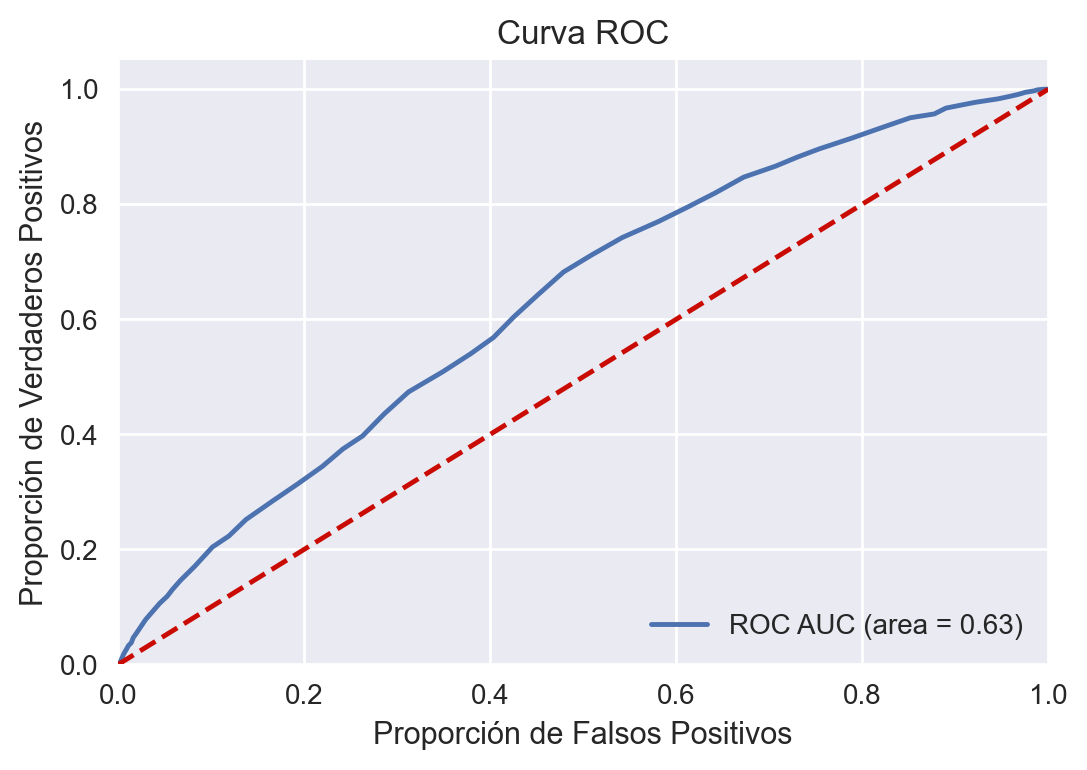

In [288]:
fp, tp, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fp, tp)

plt.plot(fp, tp, label=f"ROC AUC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="r", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proporción de Falsos Positivos")
plt.ylabel("Proporción de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")

/Users/dpalma/.pyenv/versions/desafio/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/dpalma/.pyenv/versions/desafio/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


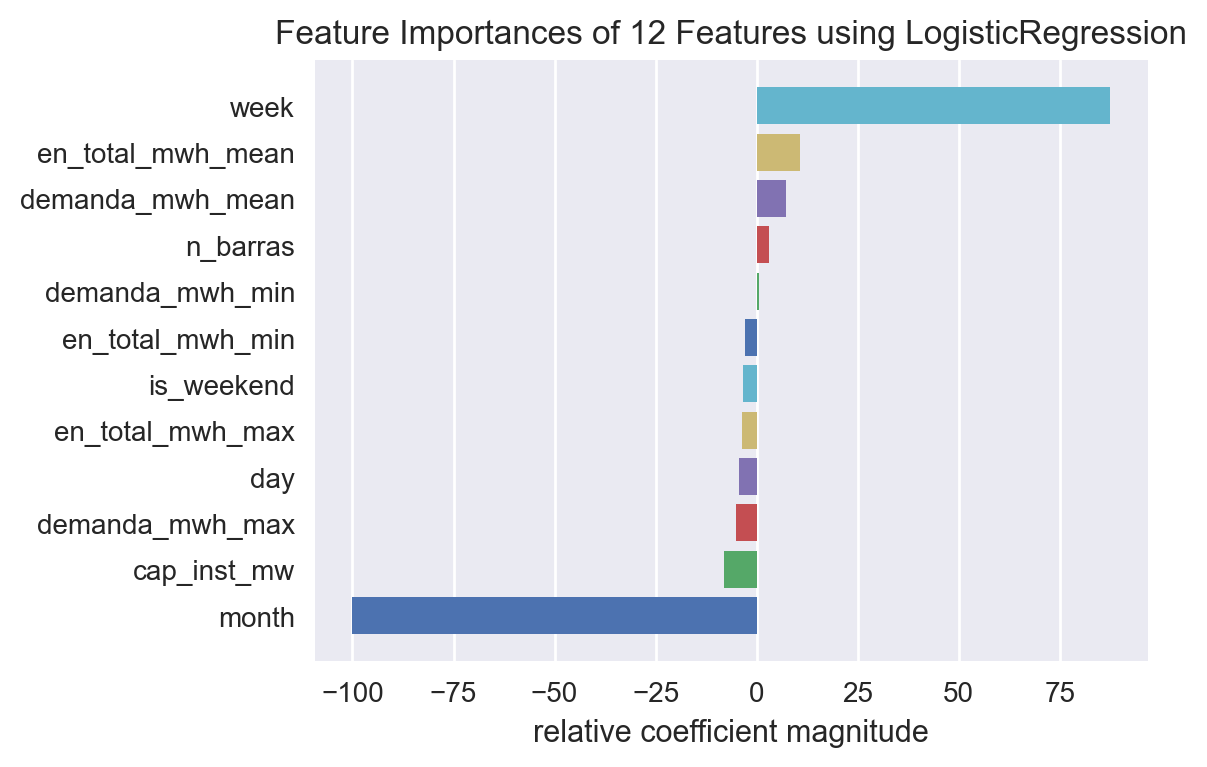

In [289]:
model = LogisticRegression(class_weight="balanced")
viz = FeatureImportances(model)
viz.fit(X_train_scaled, y_train)
viz.show()

### Comentarios

No hubo diferencia significativa (aquí pecaré, por no hacer un test de hipótesis y decir esto jeje) en los resultados. Esto nos indica que probablemente en caso de necesitar una mejor precisión habrá que refinar el modelamiento, existen varias técnicas para ello:

* Cambiar la función de costo
* Balancear muestras (sub-muestra, muestras sintéticas, etc.)
* Probar otro modelo
* Ensamblado
* Stacking

Claro que un modelo más complejo nos hace perder la explicabilidad e interpretabilidad de las predicciones. Para solventar esto podemos usar:

* Lime
* Shap Values
* Clustering y análisis de medias
* etc.

Por temas de tiempo, nos iremos al clásico Random Forests (aunque sé que podría hacer un clasificador Bayesiano, Redes neuronales, XGBoost, etc, etc, etc...)

In [290]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [291]:
y_pred = model.predict(X_test)

In [292]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     25331
           1       0.70      0.54      0.61      8468

    accuracy                           0.83     33799
   macro avg       0.78      0.73      0.75     33799
weighted avg       0.82      0.83      0.82     33799



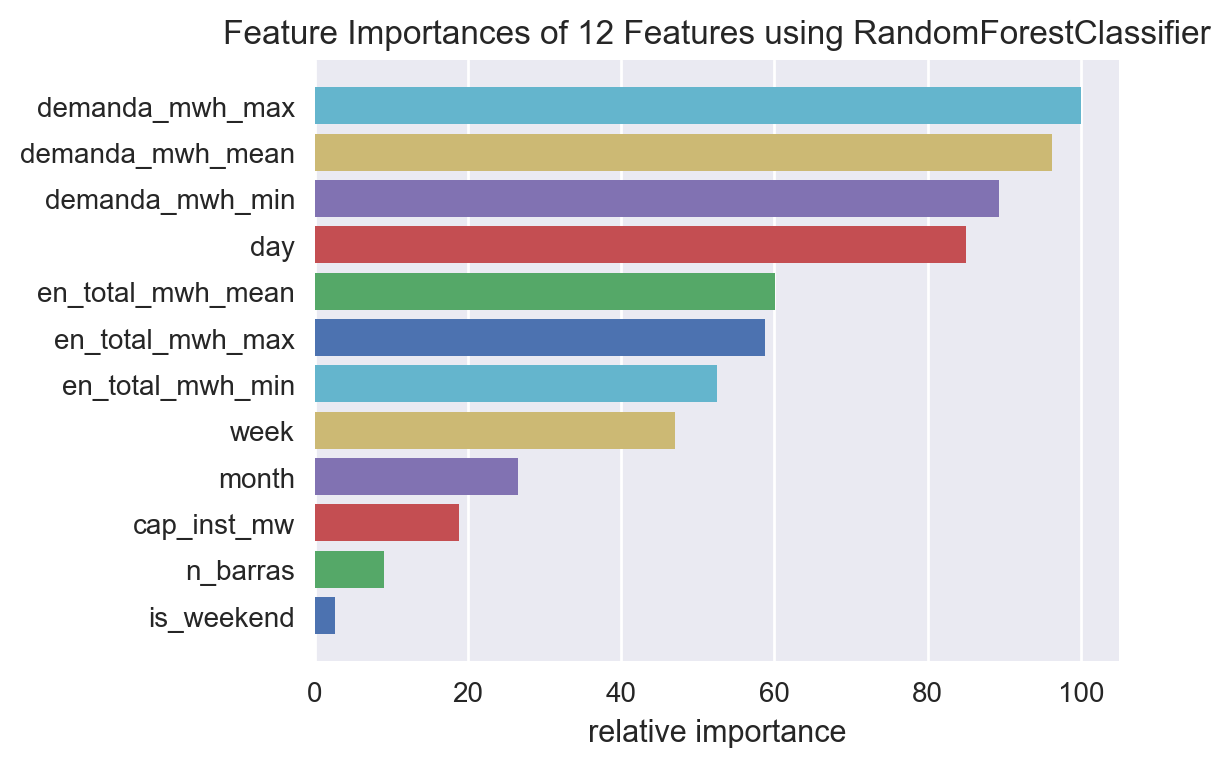

In [294]:
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()

### Comentarios

Nuestro humilde Random Forest (sin selección de hiper-parámetros), da bastante bien y mejor que el modelo de regresión Logística. Las variables más relevantes son:

* Demanda
* Día de la semana
* Energía generada

Es bastante intuitivo, sin embargo, el análisis de importancia realizado no nos indica hacia qué lado mueve la aguja la variable en el fenómeno. En estos casos quizas sería bueno analizar las predicciones con LIME o Shap values.

Por otro lado, si queremos mejorar más la precisión, podemos ajustar el hiperparámetro de la ventana de tiempo para crear las características. E incluso considerar otras características tales como: El día anterior era fin de semana? etc

## Predicción de desviaciones del costo marginal: modelo 2

Para hacerlo simple, podría proponerse un modelo que prediga si habrá o no un desvío de costo marginal en las siguientes 12 horas. Esto es debido a que en esta ventana de tiempo no se dispondrá información, por lo que se deberán realizar predicciones más a largo plazo (y probablemente, esto impacte el rendimiento del modelo)

In [324]:
def feature_extraction_se_12h(subestacion: str) -> pd.DataFrame:
    """Extrae features con desviacion a 12 horas.

    :param subestacion: Nombre de subestacion de interes
    :type subestacion: str
    :return: Features de datos agregados
    :rtype: pd.DataFrame
    """
    sub = base_prediccion_sorted[base_prediccion_sorted["nemotecnico_se"] ==
                                 subestacion]

    shifted = sub["target"].shift(-12)
    window = shifted.rolling(window=12)
    sub_target = pd.concat([window.max()], axis=1)

    features = ["demanda_mwh", "en_total_mwh"]

    other_features_df = sub[[
        "n_barras", "cap_inst_mw", "month", "week", "day", "is_weekend"
    ]]

    # Hiperparámetro
    width = 12
    shifted = sub[features].shift(width - 1)
    window = shifted.rolling(window=width)
    sub_feat = pd.concat(
        [window.min(),
         window.mean(),
         window.max(), other_features_df], axis=1)
    sub_feat.columns = create_feature_names(features) + list(
        other_features_df.columns)
    sub_feat["target"] = sub_target
    return sub_feat.dropna()

In [326]:
all_sub = pd.DataFrame()
for sub in subestaciones:
    all_sub = all_sub.append(feature_extraction_se_12h(sub))

In [327]:
all_sub.head()

,demanda_mwh_min,en_total_mwh_min,demanda_mwh_mean,en_total_mwh_mean,demanda_mwh_max,en_total_mwh_max,n_barras,cap_inst_mw,month,week,day,is_weekend,target
4343,61148556.0,0.0,1.259012e+08,0.044167,138980453.0,0.20,2,14.2881,1,1,1,0,1.0
4344,125957478.0,0.0,1.315884e+08,0.063333,138980453.0,0.23,2,14.2881,1,1,1,0,1.0
142,52660244.0,0.0,1.245701e+08,0.083333,138980453.0,0.24,2,14.2881,1,1,2,0,1.0
143,52660244.0,0.0,1.242326e+08,0.100833,138980453.0,0.24,2,14.2881,1,1,2,0,1.0
144,52660244.0,0.0,1.232195e+08,0.115000,138980453.0,0.24,2,14.2881,1,1,2,0,1.0


In [331]:
all_sub["target"] = all_sub["target"].astype(int)

In [332]:
all_sub["target"].value_counts(normalize=True)

1    0.6323
0    0.3677
Name: target, dtype: float64

In [333]:
X_train, X_test, y_train, y_test = train_test_split(
    all_sub.loc[:, "demanda_mwh_min":"is_weekend"], all_sub["target"], test_size=.3)

[Text(0.5, 1.0, 'Validación')]

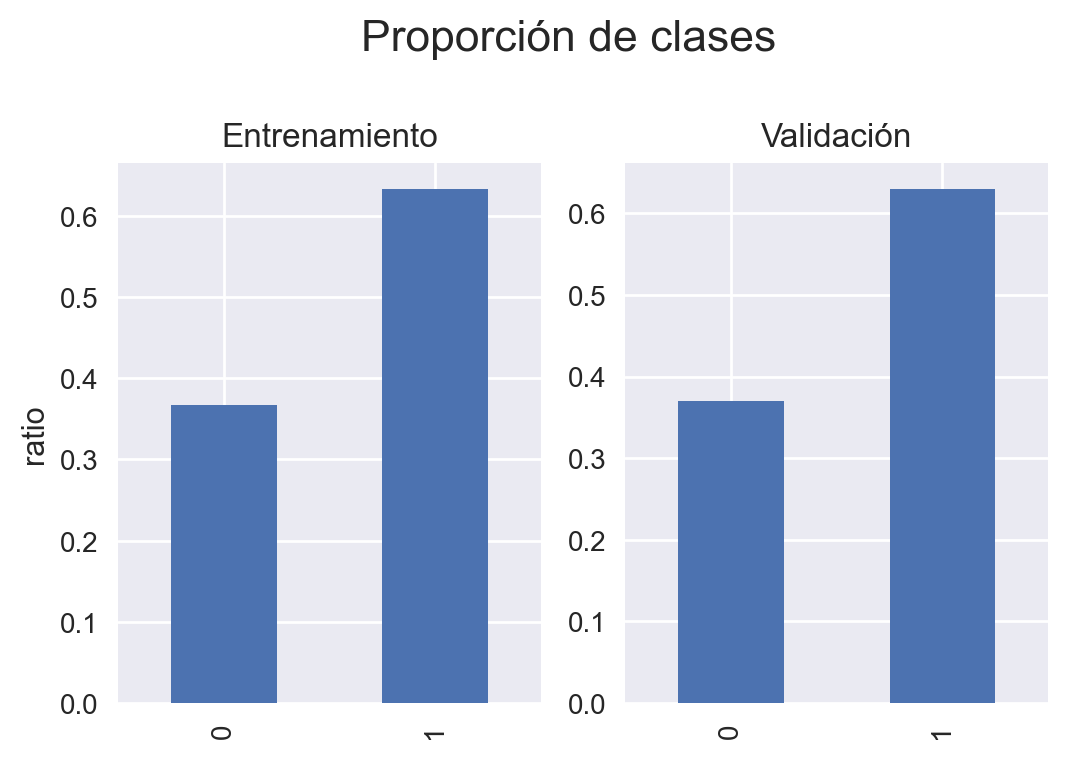

In [334]:
fig, axs = plt.subplots(1, 2)
fig.subplots_adjust(top=0.8)
fig.suptitle("Proporción de clases", fontsize=16)
pd.Series(y_train).value_counts(normalize=True, sort=False).plot.bar(ax=axs[0])
axs[0].set(ylabel="ratio", title="Entrenamiento")
pd.Series(y_test).value_counts(normalize=True, sort=False).plot.bar(ax=axs[1])
axs[1].set(title="Validación")

In [335]:
model = RandomForestClassifier(n_estimators=100, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [336]:
y_pred = model.predict(X_test)

In [337]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     12410
           1       0.95      0.97      0.96     21131

    accuracy                           0.95     33541
   macro avg       0.95      0.94      0.95     33541
weighted avg       0.95      0.95      0.95     33541



### Comentarios

Por la forma que modelé el problema, básicamente estoy considerando si habrá falla en un horizonte de 12 horas, esto considera mayor tiempo que sólo el cálculo en la hora siguiente y debido a la distribución de los datos, el posible ruido se reduce y es más probable acertar a la predicción. Este modelo da mejor que el anterior, pero es más reactivo que predictivo. No estoy seguro si aportará valor, pero las métricas de rendimiento dan bastante bien, por lo que sospecho que probablemente tengo un error y deba re-revisar.

De todas formas, como se muestra más abajo, las variables relevantes son similares a las encontradas en el caso del modelo anterior.

/Users/dpalma/.pyenv/versions/desafio/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


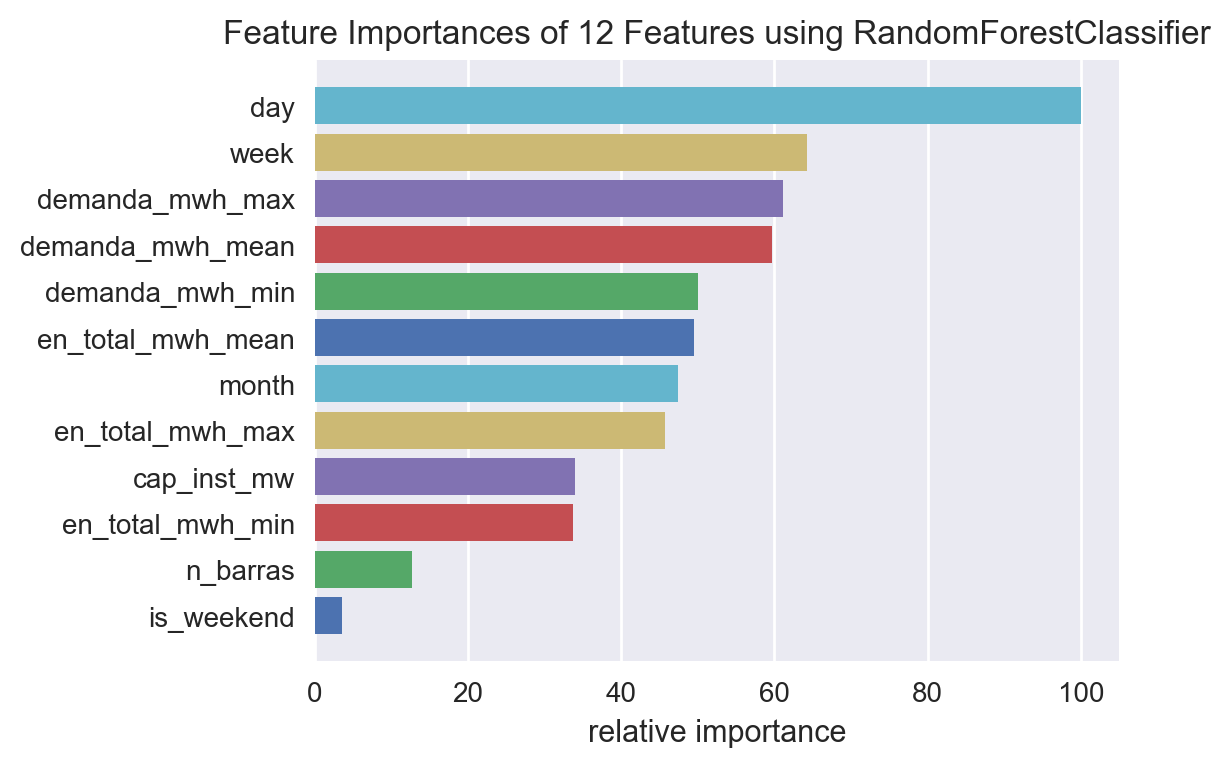

In [339]:
model = RandomForestClassifier(n_estimators=100, class_weight="balanced")
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show()

In [340]:
datos_clima = pd.read_csv(DATOS_CLIMA_URL)

In [341]:
datos_clima.head()

,fecha,subestacion,lat,lon,ALLSKY_SFC_SW_DWN,KT,PRECTOT,RH2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,TQV,TS,WS10M,WS10M_MAX,WS10M_MIN,WS50M,WS50M_MAX,WS50M_MIN
0,2019-05-06 00:00:00 UTC,SE019T002,-28.470641,-71.252694,2.0,0.31,0.00,74.66,16.39,11.94,19.01,13.93,1.78,16.62,4.14,4.93,2.81,5.01,6.23,3.50
1,2019-05-21 00:00:00 UTC,SE005T003,-42.626987,-73.805673,2.0,0.54,0.01,92.82,5.55,4.45,9.39,3.32,0.77,6.50,2.64,2.94,2.04,4.20,4.94,3.55
2,2019-02-28 00:00:00 UTC,SE005T003,-42.626987,-73.805673,2.0,0.21,2.35,88.87,12.25,10.45,15.64,9.61,2.34,12.44,2.62,3.77,1.78,4.16,5.68,2.85
3,2019-01-08 00:00:00 UTC,SE004T002,-39.549899,-72.912208,2.0,0.16,5.96,92.22,9.52,8.30,10.88,7.90,1.62,10.17,2.70,4.02,1.67,4.96,6.87,2.97
4,2019-05-07 00:00:00 UTC,SE003T011,-35.685919,-71.377335,2.0,0.37,0.00,44.02,13.57,1.49,20.38,9.57,1.05,11.34,1.69,3.58,0.65,2.25,4.42,0.96


In [344]:
datos_clima["fecha"] = pd.to_datetime(datos_clima["fecha"])

In [345]:
df_con_clima = pd.merge(base_prediccion,
                          datos_clima,
                          how='inner',
                          left_on=['fecha', 'nemotecnico_se'],
                          right_on=['fecha', 'subestacion'])

In [347]:
df_con_clima.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,T2M_MAX,T2M_MIN,TQV,TS,WS10M,WS10M_MAX,WS10M_MIN,WS50M,WS50M_MAX,WS50M_MIN
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,...,25.07,17.16,3.33,23.89,3.56,6.31,1.5,3.4,5.49,1.47
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,...,25.07,17.16,3.33,23.89,3.56,6.31,1.5,3.4,5.49,1.47
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,...,25.07,17.16,3.33,23.89,3.56,6.31,1.5,3.4,5.49,1.47
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,...,25.07,17.16,3.33,23.89,3.56,6.31,1.5,3.4,5.49,1.47
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,...,25.07,17.16,3.33,23.89,3.56,6.31,1.5,3.4,5.49,1.47


In [352]:
df_con_clima_sorted = df_con_clima.sort_values(by=["fecha", "nemotecnico_se"])

In [353]:
df_con_clima_sorted.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'year', 'month', 'week', 'day', 'weekday', 'is_weekend', 'target',
       'en_total_mwh', 'subestacion', 'lat', 'lon', 'ALLSKY_SFC_SW_DWN', 'KT',
       'PRECTOT', 'RH2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TQV', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN'],
      dtype='object')

In [369]:
def feature_extraction_se_clima_12h(subestacion: str) -> pd.DataFrame:
    """Extraer features + clima desviacion a 12 horas.

    :param subestacion: Nombre de subestacion
    :type subestacion: str
    :return: Features de datos agregados
    :rtype: pd.DataFrame
    """
    sub = df_con_clima_sorted[df_con_clima_sorted["nemotecnico_se"] ==
                              subestacion]

    shifted = sub["target"].shift(-12)
    window = shifted.rolling(window=12)
    sub_target = pd.concat([window.max()], axis=1)

    features = [
        "demanda_mwh", "en_total_mwh", "ALLSKY_SFC_SW_DWN", "KT", "PRECTOT",
        "RH2M", "T2M", "T2MDEW", "T2M_MAX", "T2M_MIN", "TQV", "TS", "WS10M",
        "WS10M_MAX", "WS10M_MIN", "WS50M", "WS50M_MAX", "WS50M_MIN"
    ]

    other_features_df = sub[[
        "n_barras", "cap_inst_mw", "month", "week", "day", "is_weekend", "lat",
        "lon"
    ]]

    # Hiperparámetro
    width = 12
    shifted = sub[features].shift(width - 1)
    window = shifted.rolling(window=width)
    sub_feat = pd.concat(
        [window.min(),
         window.mean(),
         window.max(), other_features_df], axis=1)
    sub_feat.columns = create_feature_names(features) + list(
        other_features_df.columns)
    sub_feat["target"] = sub_target
    return sub_feat.dropna()

In [355]:
all_sub = pd.DataFrame()
for sub in subestaciones:
    all_sub = all_sub.append(feature_extraction_se_clima_12h(sub))

In [370]:
all_sub.head()

,demanda_mwh_min,en_total_mwh_min,ALLSKY_SFC_SW_DWN_min,KT_min,PRECTOT_min,RH2M_min,T2M_min,T2MDEW_min,T2M_MAX_min,T2M_MIN_min,...,WS50M_MIN_max,n_barras,cap_inst_mw,month,week,day,is_weekend,lat,lon,target
142,61148556.0,0.0,8.86,0.73,0.0,37.11,21.08,5.78,27.92,15.05,...,0.21,2,14.2881,1,1,1,0,-27.487872,-70.38801,1.0
143,125957478.0,0.0,8.86,0.73,0.0,37.11,21.08,5.78,27.92,15.05,...,0.21,2,14.2881,1,1,1,0,-27.487872,-70.38801,1.0
144,52660244.0,0.0,8.86,0.73,0.0,37.11,21.08,5.78,27.92,15.05,...,0.21,2,14.2881,1,1,2,0,-27.487872,-70.38801,1.0
145,52660244.0,0.0,8.86,0.73,0.0,37.11,21.08,5.78,27.92,15.05,...,0.21,2,14.2881,1,1,2,0,-27.487872,-70.38801,1.0
146,52660244.0,0.0,8.86,0.73,0.0,37.11,21.08,5.78,27.92,15.05,...,0.21,2,14.2881,1,1,2,0,-27.487872,-70.38801,1.0


In [357]:
X_train, X_test, y_train, y_test = train_test_split(
    all_sub.loc[:, "demanda_mwh_min":"is_weekend"], all_sub["target"], test_size=.3)

In [358]:
model = RandomForestClassifier(n_estimators=100, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [359]:
y_pred = model.predict(X_test)

In [360]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     12283
         1.0       0.96      0.97      0.97     21258

    accuracy                           0.96     33541
   macro avg       0.96      0.95      0.96     33541
weighted avg       0.96      0.96      0.96     33541



Text(0.5, 0, 'Relative Importance')

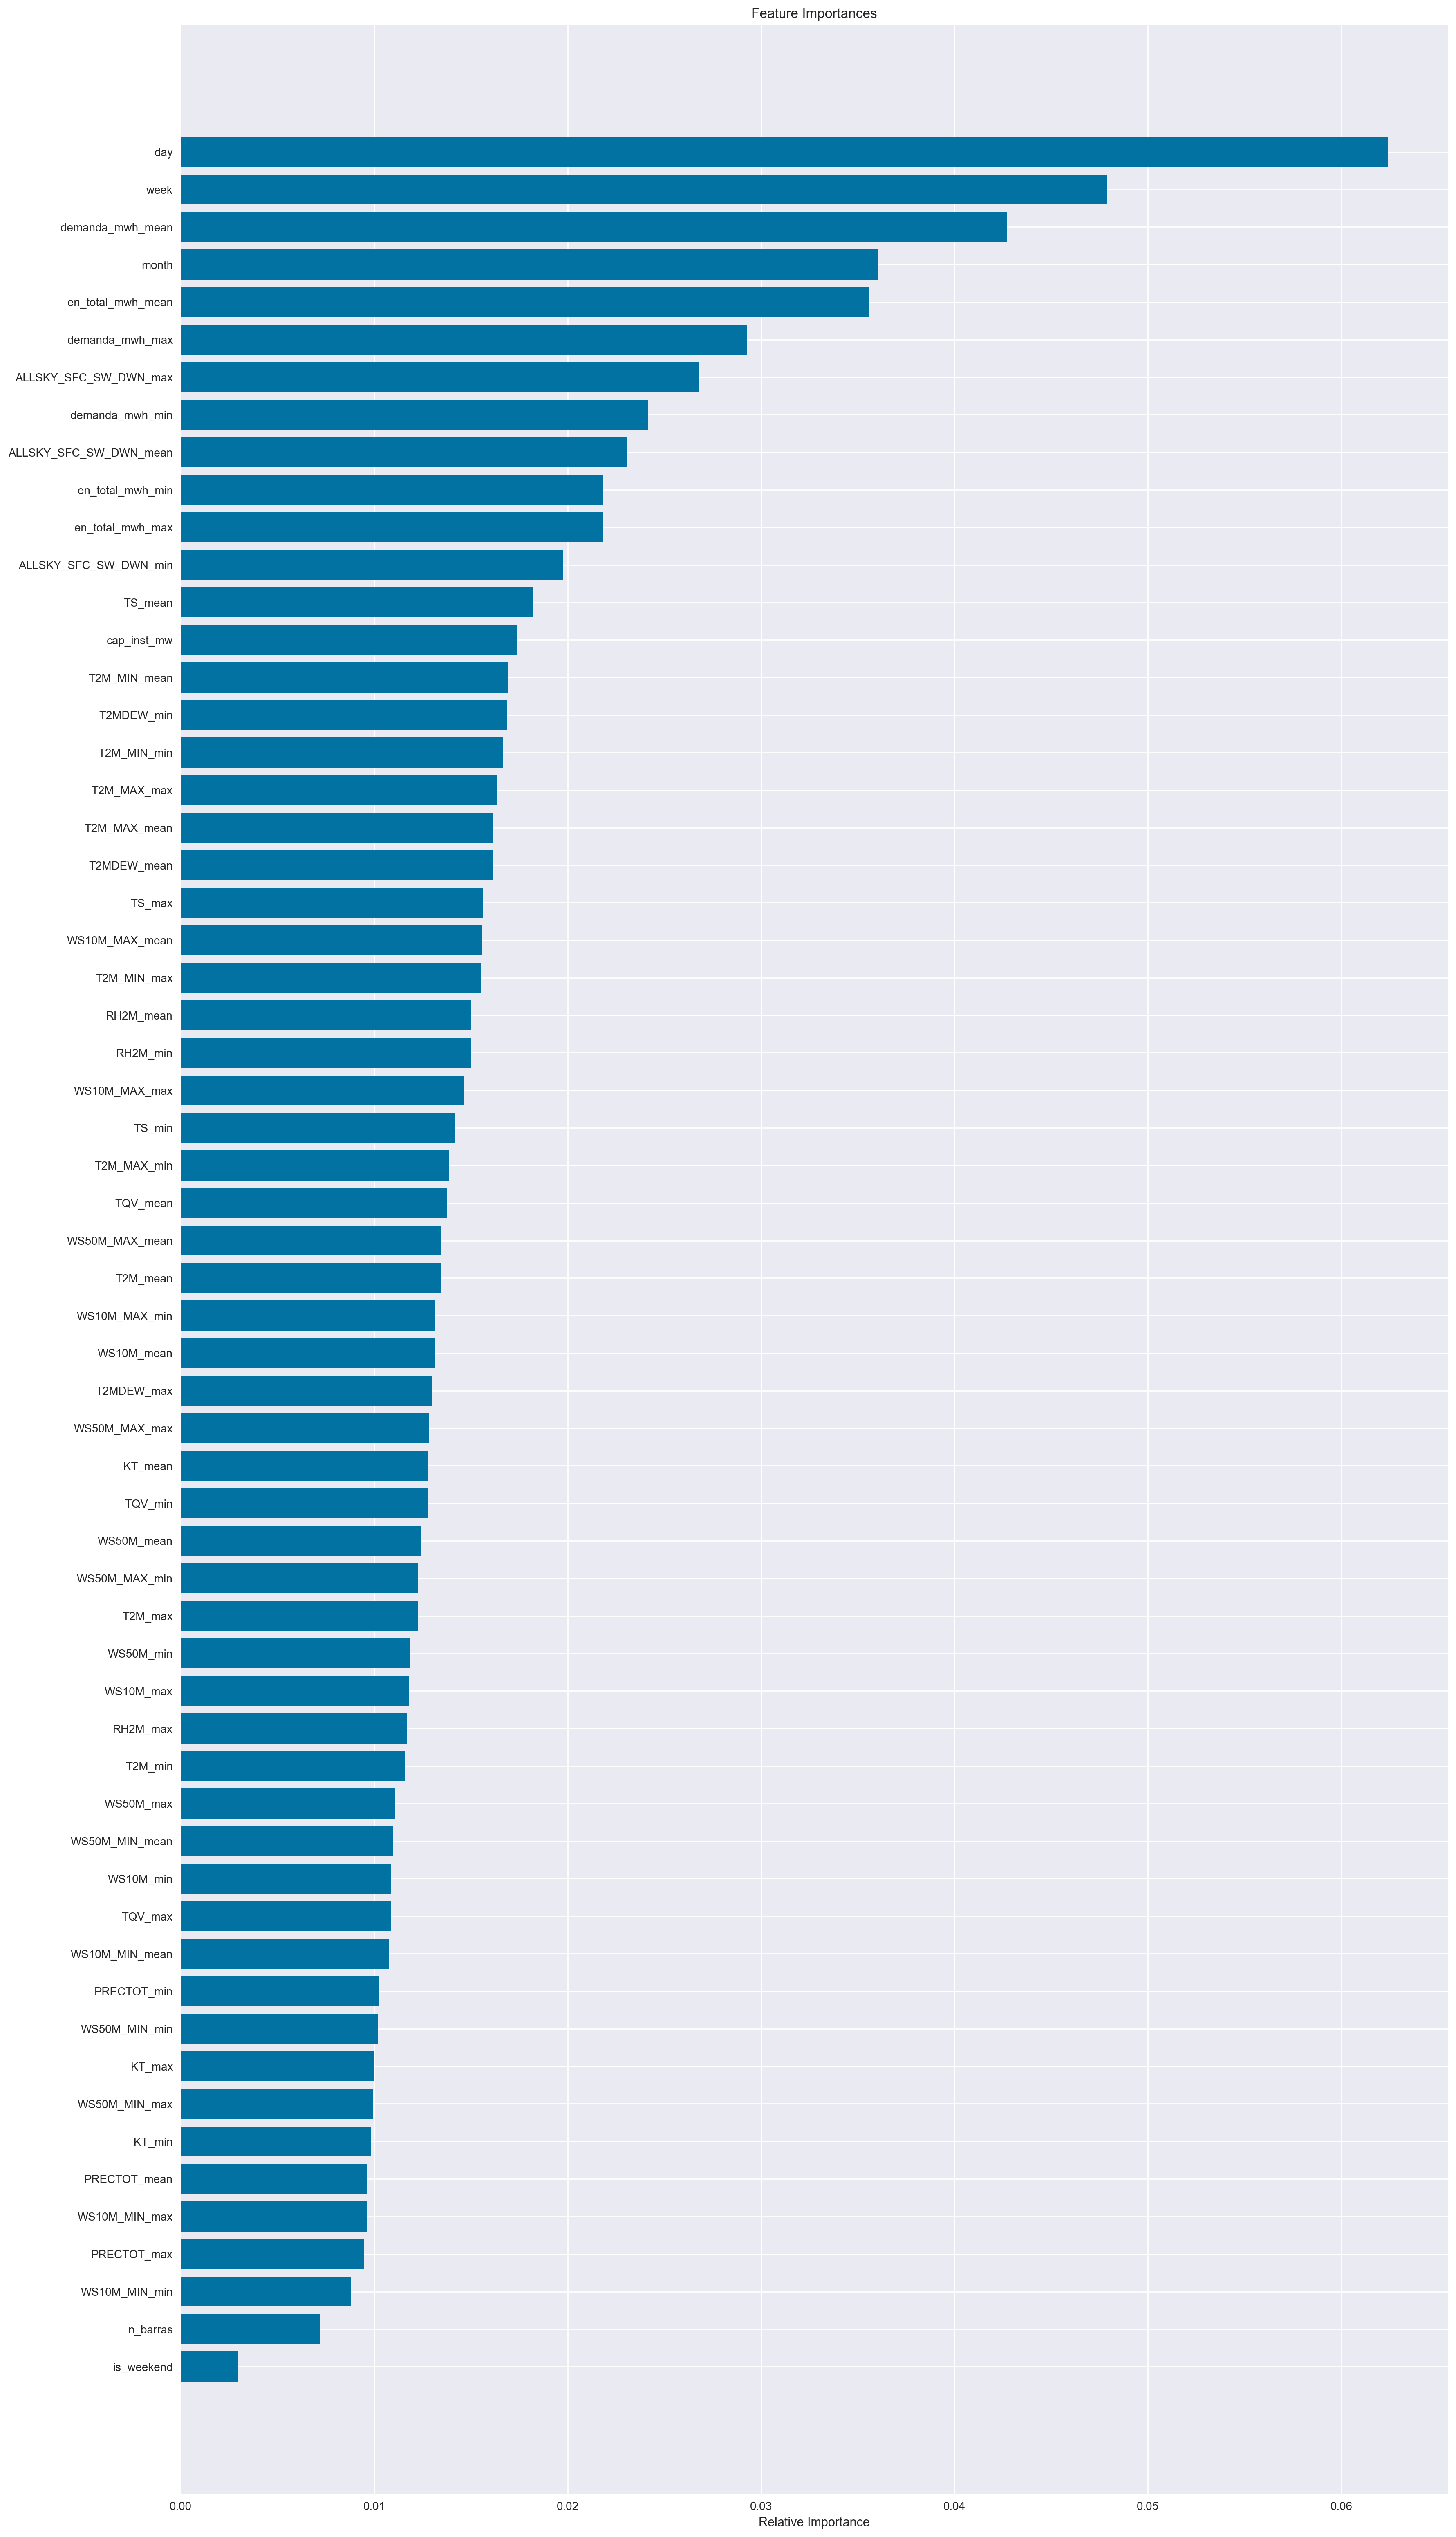

In [368]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')

### Comentarios

Con los datos del clima el modelo mejora... no mucho pero mejora (es que ya tenía buenos resultados, repito, puedo haberme equivocado en algún lado). Respecto al _data leakage_, creo que se maneja en este caso al usar una ventana agregada de características considerando el pasado, es decir en instantes $t - T$. Creo que para este caso particular, habria que quitar el presente, ya que en teoría habría que tener información agregada del clima por ejemplo.

Las variables más importantes se repiten:

* Dia
* Semana
* Demanda
* Energia Generada
* Hay algunas variables climáticas que son relevantes

Probablemente por características de operación y porque algunas subestaciones dependen del clima (por ejemplo las que generan energía solar).

##  Reflexiones

* Porque podrían tomarse decisiones respecto a la gestión de las sub-estaciones. Además que los desvíos pueden ser indicios de que hay algo que está fuera de los parámetros (demanda, generación, diferencia entre generación y demanda, condiciones climáticas.

* Casos de uso, me imagino 2: Políticas de net-metering para microgeneración. En el caso de que existiera (aunque en Chile creo que aún no hay ley para esto), cambiarse de conexión a la red (de distribución y  generación), de manera de escoger la que tenga el costo menor. Si se puede predecir los desvíos, se puede optimizar el costo de la energía.